In [1]:
import numpy as np
import tensorflow as tf
import gpflow
import matplotlib.pyplot as plt
np.random.seed(1976)
tf.random.set_seed(1976)

2022-07-26 18:27:17.780539: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-26 18:27:17.780566: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import subprocess

dim = 3 ## dimensiom
L=2     ## number of fidelity levels
W=np.array([1.6,2.6])## weight of each level

##========================
import trieste
from trieste.space import Box

search_space = trieste.space.Box(
    [0.1, 0.01, -0.1],
    [2.5, 1.00, 2.0]
)
##=======================
from scipy.optimize import Bounds
# bounds_acq=Bounds(search_space.lower.numpy(), search_space.upper.numpy()) ## the bounds to maximize the acquisition function
bounds_acq=[(0.1,2.5),(0.01,1),(-0.1,2)]
class Sim:



    threshold = 0.5

    @staticmethod
    def objective_1(input_data):
        
        x = input_data[:]
        if isinstance(x,np.ndarray):
            size=x.shape[0] 
        else:
            size = x.get_shape()[0] 
            
        sim_value = np.zeros(size)
        
        for i in range(size):
        
            f_out = open("design_vector_0.dat", "w")
            f_out.write(str(dim))
            f_out.write("\n")
            np.savetxt(f_out, x[i])
            f_out.close()
        
            subprocess.run(["./run_coarse.sh"])
        
            f_in = open("simulation_result_0.dat", "r")
            line1 = f_in.readline()
            line2 = f_in.readline()
            line3 = f_in.readline()
            sim_number = int(line1)
            sim_flag = int(line2)
            sim_value[i] = float(line3)
        
        return sim_value[:, None]

    def objective_2(input_data):
        
        x = input_data[:]
        if isinstance(x,np.ndarray):
            size=x.shape[0] 
        else:
            size = x.get_shape()[0] 
        sim_value = np.zeros(size)
        
        for i in range(size):
        
            f_out = open("design_vector_0.dat", "w")
            f_out.write(str(dim))
            f_out.write("\n")
            np.savetxt(f_out, x[i])
            f_out.close()
        
            subprocess.run(["./run_fine.sh"])
        
            f_in = open("simulation_result_0.dat", "r")
            line1 = f_in.readline()
            line2 = f_in.readline()
            line3 = f_in.readline()
            sim_number = int(line1)
            sim_flag = int(line2)
            sim_value[i] = float(line3)
        
        return sim_value[:, None]
 
    
    @staticmethod
    def constraint(input_data):
        
        x = input_data[:]
        if isinstance(x,np.ndarray):
            size=x.shape[0] 
        else:
            size = x.get_shape()[0] 
        const_value = np.zeros(size)
        
        for i in range(size):
        
            const_value[i] = x[i,1]
        
        return const_value[:, None]


In [3]:

## number of initial points
##==============================
n=[12,4]
##==============================
initial_query_points=[]
for i in range(L):
    initial_query_points.append(search_space.sample(n[i]))
##==============================
from trieste.data import Dataset

OBJECTIVE = "OBJECTIVE"
CONSTRAINT = "CONSTRAINT"

def observer_1(query_points):
    return {
        OBJECTIVE: Dataset(query_points, Sim.objective_1(query_points  )),
        CONSTRAINT: Dataset(query_points, Sim.constraint(query_points)),
    }

def observer_2(query_points):
    return {
        OBJECTIVE: Dataset(query_points, Sim.objective_2(query_points)),
        CONSTRAINT: Dataset(query_points, Sim.constraint(query_points)),
    }
observer=[observer_1,observer_2]
initial_data_1=observer[0](initial_query_points[0])
initial_data_2=observer[1](initial_query_points[1])
initial_data=[initial_data_1, initial_data_2]

2022-07-26 18:28:13.905731: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-26 18:28:13.905791: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (macaron): /proc/driver/nvidia/version does not exist


> evaluation starts ...



real	0m1.563s
user	0m0.063s
sys	0m0.153s


> evaluation done
> evaluation starts ...



real	0m1.580s
user	0m0.058s
sys	0m0.153s


> evaluation done
> evaluation starts ...



real	0m1.547s
user	0m0.049s
sys	0m0.161s


> evaluation done
> evaluation starts ...



real	0m1.561s
user	0m0.038s
sys	0m0.164s


> evaluation done
> evaluation starts ...



real	0m1.566s
user	0m0.060s
sys	0m0.159s


> evaluation done
> evaluation starts ...



real	0m1.565s
user	0m0.061s
sys	0m0.168s


> evaluation done
> evaluation starts ...



real	0m1.569s
user	0m0.066s
sys	0m0.156s


> evaluation done
> evaluation starts ...



real	0m1.551s
user	0m0.051s
sys	0m0.157s


> evaluation done
> evaluation starts ...



real	0m1.561s
user	0m0.055s
sys	0m0.155s


> evaluation done
> evaluation starts ...



real	0m1.557s
user	0m0.058s
sys	0m0.143s


> evaluation done
> evaluation starts ...



real	0m1.545s
user	0m0.054s
sys	0m0.153s


> evaluation done
> evaluation starts ...



real	0m1.582s
user	0m0.064s
sys	0m0.170s


> evaluation done
> evaluation starts ...



real	0m2.271s
user	0m0.763s
sys	0m0.169s


> evaluation done
> evaluation starts ...



real	0m2.456s
user	0m0.960s
sys	0m0.156s


> evaluation done
> evaluation starts ...



real	0m2.080s
user	0m0.589s
sys	0m0.156s


> evaluation done
> evaluation starts ...
> evaluation done



real	0m1.897s
user	0m0.392s
sys	0m0.152s


### Data Normalization

In [4]:


def normalization(observations):
    Y_max=np.max(observations)
    Y_min=np.min(observations)
    return (observations-1/2*(Y_max+Y_min))/(1/2*(Y_max-Y_min)) 


data_X=[initial_data_1[OBJECTIVE].query_points[:].numpy().reshape(n[0],dim),initial_data_2[OBJECTIVE].query_points[:].numpy().reshape(n[1],dim)]
Y=[initial_data_1[OBJECTIVE].observations[:].reshape(n[0],1) ,initial_data_2[OBJECTIVE].observations[:].reshape(n[1],1)] 
data_Y=[normalization(Y[0]) ,normalization(Y[1])]
C=[initial_data_1[CONSTRAINT].observations[:].reshape(n[0],1), initial_data_2[CONSTRAINT].observations[:].reshape(n[1],1)]
Constraint=[normalization(C[0]),normalization(C[1])]

sigma_epsilon={'OBJECTIVE':[_,_],'CONSTRAINT':[_,_]}
ro={'OBJECTIVE':[_],'CONSTRAINT':[_]}
models={'OBJECTIVE':[_,_],'CONSTRAINT':[_,_]}
k={'OBJECTIVE':[_,_],'CONSTRAINT':[_,_]}
k_inv={'OBJECTIVE':[_,_],'CONSTRAINT':[_,_]}
Y_max=[np.max(Y[0]),np.max(Y[1])]
Y_min=[np.min(Y[0]),np.min(Y[1])]
C_max=[np.max(C[0]),np.max(C[1])]
C_min=[np.min(C[0]),np.min(C[1])]


# Approximating the objective function 

## Coarse model 

In [39]:
lengthscales=[1]*dim
k[OBJECTIVE][0]=gpflow.kernels.RBF(1,lengthscales)
models[OBJECTIVE][0]=gpflow.models.GPR((data_X[0], data_Y[0]),k[OBJECTIVE][0],noise_variance=1e-5)
optimizer = gpflow.optimizers.Scipy()
optimizer.minimize(models[OBJECTIVE][0].training_loss,variables=models[OBJECTIVE][0].trainable_variables,options=dict(disp=True, maxiter=100))


sigma_epsilon[OBJECTIVE][0]=np.sqrt(float(models[OBJECTIVE][0].likelihood.variance.numpy()))
k_inv[OBJECTIVE][0]=np.linalg.inv(k[OBJECTIVE][0](data_X[0])+sigma_epsilon[OBJECTIVE][0]**2*np.eye(n[0]))


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.92156D+00    |proj g|=  1.60743D+00

At iterate    1    f=  4.44407D+00    |proj g|=  8.46697D-01

At iterate    2    f=  4.24988D+00    |proj g|=  1.20146D+00

At iterate    3    f=  3.90426D+00    |proj g|=  5.58417D-01

At iterate    4    f=  3.79468D+00    |proj g|=  2.88650D-01

At iterate    5    f=  3.78424D+00    |proj g|=  1.11461D-01

At iterate    6    f=  3.78257D+00    |proj g|=  6.91547D-02

At iterate    7    f=  3.78125D+00    |proj g|=  8.19588D-02

At iterate    8    f=  3.77887D+00    |proj g|=  1.12053D-01

At iterate    9    f=  3.77766D+00    |proj g|=  1.63746D-02

At iterate   10    f=  3.77761D+00    |proj g|=  2.19217D-03

At iterate   11    f=  3.77761D+00    |proj g|=  5.73862D-05

At iterate   12    f=  3.77761D+00    |proj g|=  3.45358D-05

           * * *

Tit   = 

 This problem is unconstrained.


# Approximating the constraint

## Coarse model

In [43]:
lengthscales=[0.01]*dim
k[CONSTRAINT][0]=gpflow.kernels.RBF(1,lengthscales)
models[CONSTRAINT][0]=gpflow.models.GPR((data_X[0], Constraint[0]),k[CONSTRAINT][0],noise_variance=1e-5)
optimizer = gpflow.optimizers.Scipy()
optimizer.minimize(models[CONSTRAINT][0].training_loss,variables=models[CONSTRAINT][0].trainable_variables,options=dict(disp=True, maxiter=100))


sigma_epsilon[CONSTRAINT][0]=np.sqrt(float(models[CONSTRAINT][0].likelihood.variance.numpy()))
k_inv[CONSTRAINT][0]=np.linalg.inv(k[CONSTRAINT][0](data_X[0])+sigma_epsilon[CONSTRAINT][0]**2*np.eye(n[0]))


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38651D+01    |proj g|=  1.99888D+00

At iterate    1    f=  1.25386D+01    |proj g|=  1.63831D-01

At iterate    2    f=  1.25349D+01    |proj g|=  8.62200D-04

At iterate    3    f=  1.25349D+01    |proj g|=  2.55346D-05

At iterate    4    f=  1.25349D+01    |proj g|=  3.80865D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4      6      1     0     0   3.809D-09   1.253D+01
  F =   12.534926571349018     

CONVERG

 This problem is unconstrained.


# Prediction 

In [10]:
def K_c(x,str): ## str='CONSTRAINT' OR 'OBJECTIVE'
    
  
    K=k[str][0](x,data_X[0])

       
    return K.numpy().T


def k_coef_c(x,str):
    if x.shape[0]==1:
        return k[str][0](x,x).numpy()
    else :
        return k[str][0](x,x).numpy().diagonal().reshape((x.shape[0],1))
    
def predict_c(x,str):
    if str=='OBJECTIVE':
        mean=np.dot(K_c(x,str).T,np.dot(k_inv[str][0],data_Y[0]))## Y
        if x.shape[0]==1:
            var=k_coef_c(x,str)+sigma_epsilon[str][0]**2-np.dot(K_c(x,str).T,np.dot(k_inv[str][0],K_c(x,str))).reshape(x.shape[0],1)
        else:
            var=k_coef_c(x,str)+sigma_epsilon[str][0]**2-np.dot(K_c(x,str).T,np.dot(k_inv[str][0],K_c(x,str))).diagonal().reshape(x.shape[0],1)   
    elif str=="CONSTRAINT":
        mean=np.dot(K_c(x,str).T,np.dot(k_inv[str][0],Constraint[0]))## Y
        if x.shape[0]==1:
            var=k_coef_c(x,str)+sigma_epsilon[str][0]**2-np.dot(K_c(x,str).T,np.dot(k_inv[str][0],K_c(x,str))).reshape(x.shape[0],1)
        else:
            var=k_coef_c(x,str)+sigma_epsilon[str][0]**2-np.dot(K_c(x,str).T,np.dot(k_inv[str][0],K_c(x,str))).diagonal().reshape(x.shape[0],1)   
    return mean,var 



# Builfing the MF model

## Objective function 

In [11]:
prev_f_obsv,_=predict_c(data_X[1], 'OBJECTIVE')
import math
def neg_log_likelihood(par, X_e,Y_e,Y_c):
    n=X_e.shape[0]
    L=par[:dim]
    Ro,var,sigma_epsilon=par[dim:]
    k=var
    for i in range(dim): 
        dist_X = (X_e[ :,i].reshape(n,1) - X_e[:,i].reshape(n,1).T)**2
        k *= np.exp(-(1/(2*(L[i]**2)))*dist_X)
    
    return float(-(-n/2*np.log(2*np.pi)-1/2*np.log(np.linalg.det(k+(sigma_epsilon**2)*np.eye(n)))-1/2*np.dot(np.dot(( Y_e-Ro*Y_c).T,np.linalg.inv(k+(sigma_epsilon**2)*np.eye(n))),(Y_e-Ro*Y_c))))
from scipy.optimize import minimize 
LENGTHSCALES=[0.1]*dim
start =LENGTHSCALES+ [0.1,0.5,0.01]
lengthscale_bound=[tuple([1.1e-6,2])]*dim
other_hyper_par_bounds=[(-np.inf,np.inf),(1e-4,30**2),(1e-4,np.inf),]
bounds=lengthscale_bound+other_hyper_par_bounds
min=minimize(neg_log_likelihood, start, args=(data_X[1],data_Y[1],prev_f_obsv), bounds=bounds,method='L-BFGS-B',options = {'disp':True,'maxiter':1000})
Li=min.x[:dim].tolist()
k[OBJECTIVE][1]=gpflow.kernels.RBF(min.x[dim+1],Li)
ro[OBJECTIVE]=[min.x[dim]]

sigma_epsilon[OBJECTIVE][1]=min.x[-1]
k_inv[OBJECTIVE][1]=np.linalg.inv(k[OBJECTIVE][1](data_X[1])+sigma_epsilon[OBJECTIVE][1]**2*np.eye(n[1]))


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55985D+00    |proj g|=  5.39879D-01

At iterate    1    f=  4.53881D+00    |proj g|=  1.82362D-01

At iterate    2    f=  4.53544D+00    |proj g|=  6.60148D-02

At iterate    3    f=  4.53458D+00    |proj g|=  1.54667D-02

At iterate    4    f=  4.53454D+00    |proj g|=  5.06226D-03

At iterate    5    f=  4.53452D+00    |proj g|=  3.70974D-03

At iterate    6    f=  4.53451D+00    |proj g|=  3.18003D-03

At iterate    7    f=  4.53449D+00    |proj g|=  9.27258D-04

At iterate    8    f=  4.53449D+00    |proj g|=  5.00933D-04

At iterate    9    f=  4.53449D+00    |proj g|=  2.42029D-04

At iterate   10    f=  4.53449D+00    |proj g|=  1.19726D-04

At iterate   11    f=  4.53449D+00    |proj g|=  4.39027D-04

At iterate   12    f=  4.53449D+00    |proj g|=  1.56586D-04

At iterate   13    f=  4.5

## Constraint 

In [12]:
prev_c_obsv,_=predict_c(data_X[1], 'CONSTRAINT')
import math
def neg_log_likelihood(par, X_e,Y_e,Y_c):
    n=X_e.shape[0]
    L=par[:dim]
    Ro,var,sigma_epsilon=par[dim:]
    k=var
    for i in range(dim): 
        dist_X = (X_e[ :,i].reshape(n,1) - X_e[:,i].reshape(n,1).T)**2
        k *= np.exp(-(1/(2*(L[i]**2)))*dist_X)
    
    return float(-(-n/2*np.log(2*np.pi)-1/2*np.log(np.linalg.det(k+(sigma_epsilon**2)*np.eye(n)))-1/2*np.dot(np.dot(( Y_e-Ro*Y_c).T,np.linalg.inv(k+(sigma_epsilon**2)*np.eye(n))),(Y_e-Ro*Y_c))))
from scipy.optimize import minimize 
LENGTHSCALES=[0.1]*dim
start =LENGTHSCALES+ [0.1,0.5,0.01]
lengthscale_bound=[tuple([1.1e-6,2])]*dim
other_hyper_par_bounds=[(-np.inf,np.inf),(1e-4,30**2),(1e-4,np.inf),]
bounds=lengthscale_bound+other_hyper_par_bounds
min=minimize(neg_log_likelihood, start, args=(data_X[1],Constraint[1],prev_c_obsv), bounds=bounds,method='L-BFGS-B',options = {'disp':True,'maxiter':1000})
Li=min.x[:dim].tolist()
k[CONSTRAINT][1]=gpflow.kernels.RBF(min.x[dim+1],Li)
ro[CONSTRAINT]=[min.x[dim]]

sigma_epsilon[CONSTRAINT][1]=min.x[-1]
k_inv[CONSTRAINT][1]=np.linalg.inv(k[CONSTRAINT][1](data_X[1])+sigma_epsilon[CONSTRAINT][1]**2*np.eye(n[1]))


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.48156D+00    |proj g|=  3.83319D-01

At iterate    1    f=  4.47322D+00    |proj g|=  6.90921D-02

At iterate    2    f=  4.47278D+00    |proj g|=  2.87793D-02

At iterate    3    f=  4.35547D+00    |proj g|=  1.66777D+00
  ys=-1.070E-02  -gs= 1.084E-02 BFGS update SKIPPED

At iterate    4    f=  4.12204D+00    |proj g|=  4.40112D-01

At iterate    5    f=  4.10322D+00    |proj g|=  4.22407D-01

At iterate    6    f=  4.08744D+00    |proj g|=  4.08916D-02

At iterate    7    f=  4.08722D+00    |proj g|=  1.00980D-02

At iterate    8    f=  4.08721D+00    |proj g|=  4.52394D-03

At iterate    9    f=  4.08720D+00    |proj g|=  2.46292D-03

At iterate   10    f=  4.08720D+00    |proj g|=  3.28626D-04

At iterate   11    f=  4.08720D+00    |proj g|=  3.10330D-04

At iterate   12    f=  4.08720D+00  

#  MF_Prediction

In [13]:
def K_MF(x,str):

    K=k[str][1](x,data_X[1])
    return K.numpy().T



def k_coef_MF(x,str):
    if x.shape[0]==1:
        return k[str][1](x,x).numpy()
    else :
        return k[str][1](x,x).numpy().diagonal().reshape((x.shape[0],1))

def f_hat(x,str) :
    if str=="OBJECTIVE":
        
        Y_e=data_Y[1]
        Y_c,var=predict_c(data_X[1],str)
        mean_c, var_c= predict_c(x,str)
    elif str=="CONSTRAINT":
        Y_e=Constraint[1]
        Y_c,var=predict_c(data_X[1],str)
        mean_c, var_c= predict_c(x,str)
    return (ro[str][0]*mean_c+np.dot(np.dot(K_MF(x,str).T, k_inv[str][1]),Y_e-ro[str]*Y_c))
def sigma_square_hat(x,str):
    mean_c, var_c= predict_c(x,str)
    
    if x.shape[0]==1:
        
        return (pow(ro[str][0],2)*var_c+sigma_epsilon[str][1]**2+k_coef_MF(x,str)-np.dot(np.dot(K_MF(x,str).T, k_inv[str][1]),K_MF(x,str)).reshape(x.shape[0],1))
    else :
        return (pow(ro[str][0],2)*var_c+sigma_epsilon[str][1]**2+k_coef_MF(x,str)-np.dot(np.dot(K_MF(x,str).T, k_inv[str][1]),K_MF(x,str)).diagonal().reshape(x.shape[0],1))
    

# EGO

In [14]:
from math import erf
##eligible set
DoE=np.concatenate((data_X[0],data_X[1])) ##desig of experiment 
ES= np.array([x.tolist() for x in DoE if (f_hat(x.reshape(1,dim), 'CONSTRAINT')<(Sim.threshold-1/2*(C_max[1]+C_min[1]))/(1/2*(C_max[1]-C_min[1])))] )##eligible set
## the current effective best 
x_best=ES[np.argmin(f_hat(ES,"OBJECTIVE"))].reshape(1,dim)
##========================================
def u(x): 
    str='OBJECTIVE'
    return (f_hat(x_best,str)-f_hat(x,str))/np.sqrt(sigma_square_hat(x,str))
from scipy.stats import norm
def EI(x):
    str='OBJECTIVE'
    return (np.sqrt(sigma_square_hat(x,str))*[u(x)*norm.cdf(u(x))+norm.pdf(u(x))]).reshape(x.shape[0],1)
def AEI_L(x):
    str='OBJECTIVE'
    return (EI(x)*(1-sigma_epsilon[str][1]/np.sqrt(sigma_square_hat(x,str)+sigma_epsilon[str][1]**2)))
def predictive_variance_update_NN(X,x_star,l_star=2):## X is  nD array 
    str='OBJECTIVE'
    try:
        

        if X.shape[0]==1:

            if l_star==1:
                M1= np.concatenate((K_c(X,str).T, k[str][0](X,x_star).numpy().reshape(1,1)),axis=1)
                r_star=1/(k_coef_c(x_star,str)+sigma_epsilon[str][0]**2-np.dot(K_c(x_star,str).T,np.dot(k_inv[str][0],K_c(x_star,str))))
                array1=np.concatenate((k_inv[str][0]+r_star*np.dot(k_inv[str][0],np.dot(K_c(x_star,str),np.dot(K_c(x_star,str).T,k_inv[str][0]))),-r_star*np.dot(k_inv[str][0],K_c(x_star,str))),axis=1)
                array2=np.concatenate((-r_star*np.dot(K_c(x_star,str).T,k_inv[str][0]),r_star  ),axis=1)                                                  
                M2=np.concatenate((array1,array2),axis=0)
                predictive_variance_update=float(np.dot(np.dot(M1,M2),M1.T)-np.dot(np.dot(K_c(X,str).T,k_inv[str][0]),K_c(X,str)))
            elif l_star==2:
                M1= np.concatenate((K_MF(X,str).T, k[str][1](X,x_star).numpy().reshape(1,1)),axis=1)
                r_star= 1/(k_coef_MF(x_star,str)+sigma_epsilon[str][1]**2-np.dot(K_MF(x_star,str).T,np.dot(k_inv[str][1],K_MF(x_star,str))))
                array1=np.concatenate((k_inv[str][1]+r_star*np.dot(k_inv[str][1],np.dot(K_MF(x_star,str),np.dot(K_MF(x_star,str).T,k_inv[str][1]))), -r_star*np.dot(k_inv[str][1],K_MF(x_star,str))),axis=1)
                array2=np.concatenate((-r_star*np.dot(K_MF(x_star,str).T,k_inv[str][1]),r_star  ),axis=1)                                                  
                M2=np.concatenate((array1,array2),axis=0)
                predictive_variance_update=float(np.dot(np.dot(M1,M2),M1.T)-np.dot(np.dot(K_MF(X,str).T,k_inv[str][1]),K_MF(X,str)))
            return predictive_variance_update
    except  TypeError:
        print('check dimension')
def predictive_variance_update(X,x_star,l):
    str='OBJECTIVE'
    P=1
    if (l<L):
        for j in range(l,L):
             P*=ro[OBJECTIVE][j-1]**2
    return P*predictive_variance_update_NN(X,x_star,l)
def probability_of_feasability(x,lambda_,l):
    
    if l==1:
        mean, var=predict_c(x,"CONSTRAINT")
        return(1/2*(1+erf((lambda_-mean)/(np.sqrt(2*var)))))
    elif l==2:

        return(1/2*(1+erf((lambda_-f_hat(x,'CONSTRAINT'))/(np.sqrt(2*sigma_square_hat(x,'CONSTRAINT'))))))
def MF_AEI_N(x,l=2):
    str='OBJECTIVE'
    lambda_constraint=(Sim.threshold-1/2*(C_max[1]+C_min[1]))/(1/2*(C_max[1]-C_min[1]))
    x=np.array(x).reshape(1,dim)
    update=predictive_variance_update(x,x,l)/sigma_square_hat(x,str)
    return float(AEI_L(x)*W[L-1]/W[l-1] *max(0,update)*probability_of_feasability(x, lambda_constraint, l))

def neg_MF_AEI_N_2(x):
    return -MF_AEI_N(x,2)
def neg_MF_AEI_N_1(x):
    return -MF_AEI_N(x,1)

def predict( model_, x,str) : 
    if (model_ is models[str][0]):
        return predict_c(x,str)
    elif (model_ is  models[1]):
        return f_hat(x,str)
    
    
best_observation=[x_best, 2]  ### the initialization 

In [15]:
RESULTS=open("MF-EGO-RESULTS-with constraints.txt", "a")

In [16]:
import time
St=time.time()
num_iter=40
num_parallel_optimizations=15
step=1/num_parallel_optimizations
best_observation=[_,_]
for i in range(num_iter):
    St_iter=time.time()
    print( ' this is the %d iteration' %i)
    best_observation_parallel=np.zeros((num_parallel_optimizations,dim))
    fidelity_level=np.zeros((num_parallel_optimizations,1))
    neg_MF_aei=np.zeros((num_parallel_optimizations,1))
    for opt in range(num_parallel_optimizations):
        print("iteration :", opt)
    
        x_0=np.zeros(dim)
        for d in range(dim):
            x_0[d]=(bounds_acq[d][1]-bounds_acq[d][0])*np.random.random_sample()+bounds_acq[d][0]

        print(' initialisation :  ', x_0) 
         ##maximizing the acquisition function for l=1
        min1=minimize(neg_MF_AEI_N_1, x_0, args=(),bounds=bounds_acq,method='L-BFGS-B', jac=None, tol=None, callback=None, options={'disp': None, 'maxcor': 20, 'ftol': 2.220446049250313e-09, 'gtol': 1e-05, 'eps': 1e-08, 'maxfun': 15000, 'maxiter': 15000, 'iprint': - 1, 'maxls': 20, 'finite_diff_rel_step': None})
         ## maximizing the aquisition function for l=2
        min2=minimize(neg_MF_AEI_N_2, x_0, args=(),bounds=bounds_acq,method='L-BFGS-B', jac=None, tol=None, callback=None, options={'disp': None, 'maxcor': 20, 'ftol': 2.220446049250313e-09, 'gtol': 1e-05, 'eps': 1e-08, 'maxfun': 15000, 'maxiter': 15000, 'iprint': - 1, 'maxls': 20, 'finite_diff_rel_step': None})
        print(' min1 :  ', min1.x,' fuction_value  ' , min1.fun)
        print(' min2 :  ', min2.x,' fuction_value  ' , min2.fun)
        if (min1.fun>min2.fun) :
        
            best_observation_parallel[opt]=min2.x.reshape(1,dim)
            fidelity_level[opt]=int(2)
            neg_MF_aei[opt]=min2.fun
        else :
            best_observation_parallel[opt]=min1.x.reshape(1,dim)
            fidelity_level[opt]=int(1)
            neg_MF_aei[opt]=min1.fun
            
    arg_min=np.argmin(neg_MF_aei)        
    best_observation[0]=best_observation_parallel[arg_min].reshape(1,dim)
    best_observation[1]=int(fidelity_level[arg_min])
    RESULTS.write(str(best_observation[0])+'  '+str(best_observation[1])+' ======>')
    
    


    ## update the design of experiment  with the new observation 
    l_star= best_observation[1]-1
    n[l_star]+=1
    data_X[l_star]=np.concatenate([data_X[l_star],best_observation[0].reshape(1,dim)])
    l_fidelity_observation=observer[l_star](best_observation[0].reshape(1,dim))
    Y_best=l_fidelity_observation[OBJECTIVE].observations[:].reshape(1,1)
    Y[l_star]=np.concatenate([Y[l_star],Y_best])
    Y_max[l_star]=np.max(Y[l_star])
    Y_min[l_star]=np.min(Y[l_star])
    data_Y[l_star]=normalization(Y[l_star])
            
    
    ##optimize all your models ( because we're using the recursive method)
    for j in range(l_star,L) :
        
        if (j==0):
            print(' adjusting the coarse objective function')
            models[OBJECTIVE][j]=gpflow.models.GPR((data_X[j], data_Y[j]),k[OBJECTIVE][j],noise_variance=1e-5)
            optimizer.minimize(models[OBJECTIVE][j].training_loss,variables=models[OBJECTIVE][j].trainable_variables,options=dict(disp=True, maxiter=1000),)
            sigma_epsilon[OBJECTIVE][j]=np.sqrt(float(models[OBJECTIVE][j].likelihood.variance.numpy()))
            k_inv[OBJECTIVE][j]=np.linalg.inv(k[OBJECTIVE][j](data_X[j])+sigma_epsilon[OBJECTIVE][j]**2*np.eye(n[j]))
            ##=================
            print(' adjusting the coarse constraint')
            models[CONSTRAINT][j]=gpflow.models.GPR((data_X[j], Constraint[j]),k[CONSTRAINT][j],noise_variance=1e-5)
            optimizer.minimize(models[CONSTRAINT][j].training_loss,variables=models[CONSTRAINT][j].trainable_variables,options=dict(disp=True, maxiter=1000),)
            sigma_epsilon[CONSTRAINT][j]=np.sqrt(float(models[CONSTRAINT][j].likelihood.variance.numpy()))
            k_inv[CONSTRAINT][j]=np.linalg.inv(k[CONSTRAINT][j](data_X[j])+sigma_epsilon[CONSTRAINT][j]**2*np.eye(n[j]))

        else :
            print('adjusting the fine objective function')
            li=min.x[:dim].tolist()
            hyp=min.x[dim:].tolist()
            start =  li+hyp
            prev_model_obs,_=predict(models[OBJECTIVE][j-1],data_X[j],'OBJECTIVE')
            min=minimize(neg_log_likelihood, start, args=(data_X[j],data_Y[j],prev_model_obs), bounds=bounds,method='L-BFGS-B',options = {'disp':True,'maxiter':2000})
            
            ro[OBJECTIVE][j-1]=min.x[dim]
            sigma_epsilon[OBJECTIVE][j]=min.x[-1]
            Li=min.x[:dim]
            k[OBJECTIVE][j]=gpflow.kernels.RBF(min.x[dim+1],Li)
            k_inv[OBJECTIVE][j]=np.linalg.inv(k[OBJECTIVE][j](data_X[j])+sigma_epsilon[OBJECTIVE][j]**2*np.eye(n[j]))
            ##=========================================
            print('adjusting the fine constraint')
            li=min.x[:dim].tolist()
            hyp=min.x[dim:].tolist()
            start =  li+hyp
            prev_model_obs,_=predict(models[CONSTRAINT][j-1],data_X[j],'CONSTRAINT')
            min=minimize(neg_log_likelihood, start, args=(data_X[j],Constraint[j],prev_model_obs), bounds=bounds,method='L-BFGS-B',options = {'disp':True,'maxiter':2000})
            
            ro[CONSTRAINT][j-1]=min.x[dim]
            sigma_epsilon[CONSTRAINT][j]=min.x[-1]
            Li=min.x[:dim]
            k[CONSTRAINT][j]=gpflow.kernels.RBF(min.x[dim+1],Li)
            k_inv[CONSTRAINT][j]=np.linalg.inv(k[CONSTRAINT][j](data_X[j])+sigma_epsilon[CONSTRAINT][j]**2*np.eye(n[j]))
    ##eligible set
    DoE=np.concatenate((data_X[0],data_X[1])) ##desig of experiment 
    ES= np.array([x.tolist() for x in DoE if (f_hat(x.reshape(1,dim), 'CONSTRAINT')<(Sim.threshold-1/2*(C_max[1]+C_min[1]))/(1/2*(C_max[1]-C_min[1])))] )##eligible set
    ## the current effective best 
    x_best=ES[np.argmin(f_hat(ES,"OBJECTIVE"))].reshape(1,dim)
    Et_iter=time.time()
    diff=(Et_iter-St_iter)/60
    RESULTS.write('    execution  time  :  '+ str(diff) + '  minutes '+'\n ')
Et=time.time()
elapsed_time=(Et-St)/60
RESULTS.write('   total  execution  time :  '+ str(elapsed_time) + '  minutes '+'\n ')
print(' execution  time :  ', elapsed_time , '  minutes ')
   

 this is the 0 iteration
iteration : 0
 initialisation :   [1.9382392  0.44410225 1.5152782 ]
 min1 :   [0.1  0.01 2.  ]  fuction_value   -0.007907241171391044
 min2 :   [2.16805636 0.47277086 0.26975768]  fuction_value   -1.3933305104675524
iteration : 1
 initialisation :   [2.33711141 0.28668128 1.57003887]
 min1 :   [2.5        0.01       0.70583621]  fuction_value   -0.005320351690696968
 min2 :   [2.16805637 0.4727709  0.26975766]  fuction_value   -1.393330510467963
iteration : 2
 initialisation :   [1.40653395 0.50210193 0.70142755]
 min1 :   [ 1.34859116  1.         -0.1       ]  fuction_value   -0.004483308680774559
 min2 :   [2.16805631 0.47277051 0.26975729]  fuction_value   -1.3933305104297007
iteration : 3
 initialisation :   [2.08139922 0.04135165 1.98027181]
 min1 :   [0.1  0.01 2.  ]  fuction_value   -0.007907241171390949
 min2 :   [2.1680562  0.47277109 0.26975774]  fuction_value   -1.3933305104640896
iteration : 4
 initialisation :   [0.86946763 0.74543589 1.58004723]



real	0m1.560s
user	0m0.057s
sys	0m0.152s


> evaluation done
> evaluation starts ...



real	0m1.550s
user	0m0.054s
sys	0m0.156s


> evaluation done
> evaluation starts ...



real	0m2.065s
user	0m0.556s
sys	0m0.148s


> evaluation done
> evaluation starts ...



real	0m2.061s
user	0m0.555s
sys	0m0.153s


> evaluation done
 adjusting the coarse objective function


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.49816D+00    |proj g|=  5.73637D-01

At iterate    1    f=  2.47238D+00    |proj g|=  2.94724D-01

At iterate    2    f=  2.46713D+00    |proj g|=  1.28353D-01

At iterate    3    f=  2.46392D+00    |proj g|=  6.67898D-02

At iterate    4    f=  2.46271D+00    |proj g|=  5.71379D-02

At iterate    5    f=  2.46163D+00    |proj g|=  1.96293D-02

At iterate    6    f=  2.46161D+00    |proj g|=  9.50716D-03

At iterate    7    f=  2.46161D+00    |proj g|=  9.06504D-04

At iterate    8    f=  2.46161D+00    |proj g|=  9.06210D-04

At iterate    9    f=  2.46161D+00    |proj g|=  9.05170D-04

At iterate   10    f=  2.46161D+00    |proj g|=  1.61921D-03

At iterate   11    f=  2.46160D+00    |proj g|=  2.09881D-03

At iterate   12    f=  2.46160D+00    |proj g|=  2.89570D-03

At iterate   13    f=  2.4

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30845D+01    |proj g|=  3.94417D-01

At iterate    1    f=  1.30648D+01    |proj g|=  4.45381D-02

At iterate    2    f=  1.30646D+01    |proj g|=  2.98697D-03

At iterate    3    f=  1.30646D+01    |proj g|=  2.05051D-05

At iterate    4    f=  1.30646D+01    |proj g|=  9.34371D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4      6      1     0     0   9.344D-09   1.306D+01
  F =   13.064613126294516     

CONVERG

 min1 :   [2.05690115 0.33151727 0.96335775]  fuction_value   -5.431467029379399e-06
 min2 :   [2.00297628 0.01       0.70257572]  fuction_value   -0.04373333983806785
iteration : 12
 initialisation :   [0.68121539 0.25347722 0.87237721]
 min1 :   [0.68121539 0.25347722 0.87237721]  fuction_value   -1.4173339682774932e-06
 min2 :   [2.00295285 0.01       0.70257887]  fuction_value   -0.04373333984276695
iteration : 13
 initialisation :   [0.585696   0.03025636 1.09589664]
 min1 :   [0.58570366 0.03025582 1.09591359]  fuction_value   -2.5157249413183227e-06
 min2 :   [2.00297932 0.01       0.70259217]  fuction_value   -0.04373333980858157
iteration : 14
 initialisation :   [0.53049676 0.86753755 1.38709323]
 min1 :   [0.52758939 0.86476817 1.4192459 ]  fuction_value   -1.728724544494953e-05
 min2 :   [2.00292356 0.01       0.70258062]  fuction_value   -0.04373333980420868
> evaluation starts ...



real	0m1.556s
user	0m0.052s
sys	0m0.153s


> evaluation done
> evaluation starts ...



real	0m1.542s
user	0m0.044s
sys	0m0.160s


> evaluation done
> evaluation starts ...



real	0m1.598s
user	0m0.085s
sys	0m0.164s


> evaluation done
> evaluation starts ...



real	0m1.582s
user	0m0.077s
sys	0m0.166s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11746D+01    |proj g|=  1.30114D+01

At iterate    1    f=  7.49405D+00    |proj g|=  2.32340D+00

At iterate    2    f=  7.01211D+00    |proj g|=  1.83491D+00

At iterate    3    f=  6.55781D+00    |proj g|=  6.75769D-01

At iterate    4    f=  6.45151D+00    |proj g|=  7.13849D-01

At iterate    5    f=  6.32120D+00    |proj g|=  8.32694D-01

At iterate    6    f=  6.18141D+00    |proj g|=  7.28313D-01

At iterate    7    f=  6.01762D+00    |proj g|=  7.18555D-01

At iterate    8    f=  5.89982D+00    |proj g|=  6.54643D-01

At iterate    9    f=  5.84955D+00    |proj g|=  3.91916D-01

At iterate   10    f=  5.82807D+00    |proj g|=  2.05312D-01

At iterate   11    f=  5.82526D+00    |proj g|=  1.39473D-01

At iterate   12    f=  5.8230

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46229D+01    |proj g|=  4.48293D-01

At iterate    1    f=  1.46022D+01    |proj g|=  2.63044D-02

At iterate    2    f=  1.46022D+01    |proj g|=  1.59792D-03

At iterate    3    f=  1.46022D+01    |proj g|=  6.25890D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      5      1     0     0   6.259D-06   1.460D+01
  F =   14.602154371525973     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
adjustin

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           10

At X0         2 variables are exactly at the bounds

At iterate    0    f=  2.33036D+01    |proj g|=  2.63039D+02

At iterate    1    f=  7.22064D+00    |proj g|=  1.01752D+00

At iterate    2    f=  4.54576D+00    |proj g|=  3.74960D+00

At iterate    3    f=  3.19333D+00    |proj g|=  1.07499D+01

At iterate    4    f=  2.07786D+00    |proj g|=  7.18903D+00

At iterate    5    f=  1.88975D+00    |proj g|=  1.84926D+00

At iterate    6    f=  1.52577D+00    |proj g|=  1.60835D+00

At iterate    7    f=  1.41893D+00    |proj g|=  1.29013D+00

At iterate    8    f=  1.36920D+00    |proj g|=  2.25865D+00

At iterate    9    f=  1.35643D+00    |proj g|=  3.89127D-01

At iterate   10    f=  1.34882D+00    |proj g|=  3.16363D-01

At iterate   11    f=  1.34592D+00    |proj g|=  5.28516D-01

At iterate   12    f=  1.34115D+00    |proj g|=  1.28700D+00

At iterate   13    f=  1.33055D+00    |proj g|=  2.09135D+00

At iterat


real	0m1.557s
user	0m0.058s
sys	0m0.154s


> evaluation done
> evaluation starts ...



real	0m1.562s
user	0m0.068s
sys	0m0.143s


> evaluation done
 adjusting the coarse objective function


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04807D+00    |proj g|=  8.19091D-01

At iterate    1    f=  5.99864D+00    |proj g|=  3.29059D-01

At iterate    2    f=  5.98429D+00    |proj g|=  2.11447D-01

At iterate    3    f=  5.96514D+00    |proj g|=  1.08449D-01

At iterate    4    f=  5.96028D+00    |proj g|=  2.50631D-02

At iterate    5    f=  5.96004D+00    |proj g|=  2.12706D-02

At iterate    6    f=  5.96002D+00    |proj g|=  1.69761D-03

At iterate    7    f=  5.96002D+00    |proj g|=  8.75277D-04

At iterate    8    f=  5.96002D+00    |proj g|=  8.75349D-04

At iterate    9    f=  5.96002D+00    |proj g|=  1.10606D-03

At iterate   10    f=  5.96001D+00    |proj g|=  2.25109D-03

At iterate   11    f=  5.95999D+00    |proj g|=  5.33794D-03

At iterate   12    f=  5.95994D+00    |proj g|=  9.03654D-03

At iterate   13    f=  5.9

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55053D+01    |proj g|=  1.11485D-01

At iterate    1    f=  1.55040D+01    |proj g|=  1.06831D-02

At iterate    2    f=  1.55040D+01    |proj g|=  1.66932D-04

At iterate    3    f=  1.55040D+01    |proj g|=  2.44186D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      5      1     0     0   2.442D-07   1.550D+01
  F =   15.504009787308945     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
adjustin

 min1 :   [ 1.8049328   0.31366921 -0.1       ]  fuction_value   -0.11922636668547433
 min2 :   [ 1.96093034  0.49507184 -0.1       ]  fuction_value   -0.02356079536966774
iteration : 9
 initialisation :   [0.92200677 0.48547109 1.70866583]
 min1 :   [0.11302742 0.13584135 2.        ]  fuction_value   -0.19875328832942263
 min2 :   [0.96137524 0.71986931 2.        ]  fuction_value   -0.008808367360035943
iteration : 10
 initialisation :   [1.6825001  0.03390544 1.32559328]
 min1 :   [2.5  0.01 2.  ]  fuction_value   -0.031290293213830755
 min2 :   [2.5        0.12002501 2.        ]  fuction_value   -0.00308860785121081
iteration : 11
 initialisation :   [2.26774037 0.08314603 1.17653046]
 min1 :   [2.5  0.01 2.  ]  fuction_value   -0.031290293213830755
 min2 :   [2.5        0.12021404 2.        ]  fuction_value   -0.00308860792838579
iteration : 12
 initialisation :   [1.75061372 0.06006036 0.55729136]
 min1 :   [ 2.44866385  0.95815823 -0.1       ]  fuction_value   -0.0768966688540699


real	0m1.556s
user	0m0.045s
sys	0m0.159s


> evaluation done
> evaluation starts ...



real	0m1.554s
user	0m0.040s
sys	0m0.171s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.64397D+00    |proj g|=  1.02464D+00

At iterate    1    f=  5.53249D+00    |proj g|=  4.41421D-01

At iterate    2    f=  5.51434D+00    |proj g|=  3.44339D-01

At iterate    3    f=  5.46801D+00    |proj g|=  1.28527D-01

At iterate    4    f=  5.46177D+00    |proj g|=  3.98814D-02

At iterate    5    f=  5.46123D+00    |proj g|=  9.74903D-03

At iterate    6    f=  5.46122D+00    |proj g|=  4.64848D-03

At iterate    7    f=  5.46122D+00    |proj g|=  1.00651D-03

At iterate    8    f=  5.46121D+00    |proj g|=  1.00614D-03

At iterate    9    f=  5.46121D+00    |proj g|=  4.43008D-03

At iterate   10    f=  5.46119D+00    |proj g|=  9.62636D-03

At iterate   11    f=  5.46115D+00    |proj g|=  1.74674D-02

At iterate   12    f=  5.4610

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65784D+01    |proj g|=  3.26687D-02

At iterate    1    f=  1.65783D+01    |proj g|=  2.67727D-03

At iterate    2    f=  1.65783D+01    |proj g|=  1.11711D-05

At iterate    3    f=  1.65783D+01    |proj g|=  3.84406D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      5      1     0     0   3.844D-09   1.658D+01
  F =   16.578315129969386     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
adjustin

 This problem is unconstrained.


ate   26    f=  1.32538D+00    |proj g|=  6.91096D-02

At iterate   27    f=  1.32452D+00    |proj g|=  9.55116D-02
  Positive dir derivative in projection 
  Using the backtracking step 

At iterate   28    f=  1.32426D+00    |proj g|=  8.67683D-02

At iterate   29    f=  1.32391D+00    |proj g|=  2.79307D-02

At iterate   30    f=  1.32391D+00    |proj g|=  1.16240D-03

At iterate   31    f=  1.32391D+00    |proj g|=  1.06137D-05

At iterate   32    f=  1.32391D+00    |proj g|=  4.75175D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     52     35     0     2   4.752D-06   1.324D+00
  F =   1.323907582


real	0m1.579s
user	0m0.068s
sys	0m0.152s


> evaluation done
> evaluation starts ...



real	0m1.577s
user	0m0.076s
sys	0m0.152s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.01011D+00    |proj g|=  1.00425D+00

At iterate    1    f=  5.87932D+00    |proj g|=  3.36185D-01

At iterate    2    f=  5.86746D+00    |proj g|=  1.52725D-01

At iterate    3    f=  5.86405D+00    |proj g|=  1.30265D-01

At iterate    4    f=  5.85958D+00    |proj g|=  6.80091D-02

At iterate    5    f=  5.85769D+00    |proj g|=  3.07838D-02

At iterate    6    f=  5.85722D+00    |proj g|=  1.37716D-02

At iterate    7    f=  5.85720D+00    |proj g|=  3.42753D-03

At iterate    8    f=  5.85720D+00    |proj g|=  3.71563D-04

At iterate    9    f=  5.85720D+00    |proj g|=  4.49366D-05

At iterate   10    f=  5.85720D+00    |proj g|=  2.05531D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evalu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66588D+01    |proj g|=  7.64202D-01

At iterate    1    f=  1.66014D+01    |proj g|=  9.07914D-02

At iterate    2    f=  1.66007D+01    |proj g|=  9.22407D-03

At iterate    3    f=  1.66007D+01    |proj g|=  9.61407D-05

At iterate    4    f=  1.66007D+01    |proj g|=  1.00229D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4      6      1     0     0   1.002D-07   1.660D+01
  F =   16.600697654991915     

CONVERG

 min1 :   [0.71338082 0.07338891 0.7910803 ]  fuction_value   -1.6122219442500957e-14
 min2 :   [0.71338082 0.07338891 0.7910803 ]  fuction_value   -2.217800207282752e-14
iteration : 10
 initialisation :   [1.02661745 0.39258988 1.87356334]
 min1 :   [0.30590086 0.01       2.        ]  fuction_value   -0.28144816723007304
 min2 :   [0.11303274 0.13581639 2.        ]  fuction_value   -0.2807121354125632
iteration : 11
 initialisation :   [0.86928169 0.46079858 0.58194055]
 min1 :   [0.86928169 0.46079858 0.58194055]  fuction_value   -7.9484468675938415e-25
 min2 :   [0.86928169 0.46079858 0.58194055]  fuction_value   -2.616197250615908e-24
iteration : 12
 initialisation :   [0.30742946 0.07382014 0.85424087]
 min1 :   [0.30742946 0.07382014 0.85424087]  fuction_value   -1.496723840145797e-16
 min2 :   [0.30742946 0.07382014 0.85424087]  fuction_value   -4.2281990779487345e-16
iteration : 13
 initialisation :   [2.29061953 0.74641267 0.81861896]
 min1 :   [2.5        1.         0.2495958


real	0m1.564s
user	0m0.055s
sys	0m0.158s


> evaluation done
> evaluation starts ...



real	0m1.564s
user	0m0.057s
sys	0m0.156s


> evaluation done
 adjusting the coarse objective function


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.82151D+00    |proj g|=  7.46704D-01

At iterate    1    f=  4.79325D+00    |proj g|=  3.74649D-01

At iterate    2    f=  4.78683D+00    |proj g|=  1.89721D-01

At iterate    3    f=  4.78112D+00    |proj g|=  3.49644D-02

At iterate    4    f=  4.78089D+00    |proj g|=  1.55097D-02

At iterate    5    f=  4.78081D+00    |proj g|=  5.19035D-03

At iterate    6    f=  4.78080D+00    |proj g|=  2.15956D-03

At iterate    7    f=  4.78080D+00    |proj g|=  4.49671D-04

At iterate    8    f=  4.78080D+00    |proj g|=  2.33908D-04

At iterate    9    f=  4.78080D+00    |proj g|=  2.33818D-04

At iterate   10    f=  4.78080D+00    |proj g|=  3.54897D-04

At iterate   11    f=  4.78080D+00    |proj g|=  5.63194D-04

At iterate   12    f=  4.78079D+00    |proj g|=  1.11748D-03

At iterate   13    f=  4.7

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           10

At X0         3 variables are exactly at the bounds

At iterate    0    f=  3.10615D+01    |proj g|=  3.92194D+02

At iterate    1    f=  7.51592D+00    |proj g|=  1.11232D+00

At iterate    2    f=  5.92266D+00    |proj g|=  1.50699D+00
  ys=-2.728E-02  -gs= 1.523E+00 BFGS update SKIPPED

At iterate    3    f=  5.23172D+00    |proj g|=  2.38725D+00

At iterate    4    f=  4.58418D+00    |proj g|=  4.02758D+00

At iterate    5    f=  3.89590D+00    |proj g|=  8.35143D+00

At iterate    6    f=  3.16929D+00    |proj g|=  1.22787D+01

At iterate    7    f=  2.77346D+00    |proj g|=  1.30645D+01

At iterate    8    f=  2.43024D+00    |proj g|=  1.06322D+00

At iterate    9    f=  2.35548D+00    |proj g|=  5.42916D-01

At iterate   10    f=  2.34034D+00    |proj g|=  4.08995D-01

At iterate   11    f=  2.33602D+00    |proj g|=  3.41432D-01

At iterate   12    f=  2.32794D+00    |proj g|=  1.29891D-01

At iterate   13    


real	0m1.547s
user	0m0.060s
sys	0m0.159s


> evaluation done
> evaluation starts ...



real	0m1.554s
user	0m0.069s
sys	0m0.150s


> evaluation done
 adjusting the coarse objective function


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.20264D+00    |proj g|=  9.58370D+00

At iterate    1    f=  5.16527D+00    |proj g|=  1.38485D+00

At iterate    2    f=  4.62759D+00    |proj g|=  1.15675D+00

At iterate    3    f=  4.40990D+00    |proj g|=  6.87639D-01

At iterate    4    f=  4.33872D+00    |proj g|=  4.45728D-01

At iterate    5    f=  4.27968D+00    |proj g|=  1.79685D-01

At iterate    6    f=  4.27282D+00    |proj g|=  8.18546D-02

At iterate    7    f=  4.27120D+00    |proj g|=  8.69180D-03

At iterate    8    f=  4.27119D+00    |proj g|=  1.39149D-03

At iterate    9    f=  4.27119D+00    |proj g|=  7.42135D-04

At iterate   10    f=  4.27119D+00    |proj g|=  7.41660D-04

At iterate   11    f=  4.27119D+00    |proj g|=  2.41402D-03

At iterate   12    f=  4.27118D+00    |proj g|=  3.73023D-03

At iterate   13    f=  4.2

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88960D+01    |proj g|=  6.33412D-01

At iterate    1    f=  1.88667D+01    |proj g|=  3.60558D-02

At iterate    2    f=  1.88666D+01    |proj g|=  2.15841D-03

At iterate    3    f=  1.88666D+01    |proj g|=  8.07069D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      5      1     0     0   8.071D-06   1.887D+01
  F =   18.866624818098099     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
adjustin

 min1 :   [0.1        0.62311666 2.        ]  fuction_value   -0.2961564382909727
 min2 :   [0.11178153 0.05639061 2.        ]  fuction_value   -0.13917485910414298
iteration : 4
 initialisation :   [ 0.53573122  0.36091591 -0.03982482]
 min1 :   [ 0.53573122  0.36091591 -0.03982482]  fuction_value   -1.3525322132224735e-22
 min2 :   [ 0.53573122  0.36091591 -0.03982482]  fuction_value   -1.7659403599895736e-22
iteration : 5
 initialisation :   [0.80489422 0.94376177 0.1542111 ]
 min1 :   [ 2.40698852  0.67766231 -0.1       ]  fuction_value   -0.2261481860367381
 min2 :   [0.80489422 0.94376177 0.1542111 ]  fuction_value   -1.995302351581939e-07
iteration : 6
 initialisation :   [0.32282102 0.39124583 0.84114101]
 min1 :   [0.32282102 0.39124583 0.84114101]  fuction_value   -1.0963625718961276e-16
 min2 :   [0.32282102 0.39124583 0.84114101]  fuction_value   -1.0904839463444307e-16
iteration : 7
 initialisation :   [0.95742061 0.1022829  1.90646826]
 min1 :   [0.39913712 0.13796427 2. 


real	0m1.552s
user	0m0.044s
sys	0m0.164s


> evaluation done
> evaluation starts ...



real	0m1.565s
user	0m0.045s
sys	0m0.158s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23088D+00    |proj g|=  1.23388D+00

At iterate    1    f=  3.19428D+00    |proj g|=  5.55731D-01

At iterate    2    f=  3.18100D+00    |proj g|=  1.84168D-01

At iterate    3    f=  3.17875D+00    |proj g|=  1.48233D-01

At iterate    4    f=  3.17275D+00    |proj g|=  5.41851D-02

At iterate    5    f=  3.17191D+00    |proj g|=  2.44139D-02

At iterate    6    f=  3.17180D+00    |proj g|=  4.14918D-03

At iterate    7    f=  3.17180D+00    |proj g|=  1.27446D-03

At iterate    8    f=  3.17180D+00    |proj g|=  1.27425D-03

At iterate    9    f=  3.17179D+00    |proj g|=  2.37872D-03

At iterate   10    f=  3.17179D+00    |proj g|=  5.54878D-03

At iterate   11    f=  3.17176D+00    |proj g|=  1.12460D-02

At iterate   12    f=  3.1717

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00040D+01    |proj g|=  1.17560D-01

At iterate    1    f=  2.00030D+01    |proj g|=  9.03627D-03

At iterate    2    f=  2.00030D+01    |proj g|=  1.03197D-04

At iterate    3    f=  2.00030D+01    |proj g|=  9.21684D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      5      1     0     0   9.217D-08   2.000D+01
  F =   20.002977454789217     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
adjustin

 min1 :   [1.23874234 0.39031752 2.        ]  fuction_value   -0.001781943346234491
 min2 :   [1.3443015  0.51346712 2.        ]  fuction_value   -0.00018306147799043148
iteration : 6
 initialisation :   [2.17043241 0.0507318  1.53461609]
 min1 :   [2.5  0.01 2.  ]  fuction_value   -0.00420949483274607
 min2 :   [2.5  0.01 2.  ]  fuction_value   -0.00035877093014845973
iteration : 7
 initialisation :   [0.53931563 0.06347533 0.34258826]
 min1 :   [0.53931563 0.06347533 0.34258826]  fuction_value   -2.1416171810743394e-15
 min2 :   [0.53931563 0.06347533 0.34258826]  fuction_value   -1.0170027213137018e-15
iteration : 8
 initialisation :   [0.52601952 0.50603962 1.17508534]
 min1 :   [0.52601952 0.50603962 1.17508534]  fuction_value   -1.15208443459067e-21
 min2 :   [0.52601952 0.50603962 1.17508534]  fuction_value   -2.0602173958681634e-22
iteration : 9
 initialisation :   [2.09198233 0.76227564 0.86041223]
 min1 :   [2.09198233 0.76227564 0.86041223]  fuction_value   -6.56731273488968


real	0m1.530s
user	0m0.048s
sys	0m0.153s


> evaluation done
> evaluation starts ...



real	0m1.567s
user	0m0.053s
sys	0m0.152s


> evaluation done
 adjusting the coarse objective function


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37537D+00    |proj g|=  5.29113D-01

At iterate    1    f=  2.35281D+00    |proj g|=  2.98831D-01

At iterate    2    f=  2.34577D+00    |proj g|=  2.36709D-01

At iterate    3    f=  2.34249D+00    |proj g|=  1.38728D-01

At iterate    4    f=  2.33827D+00    |proj g|=  7.76945D-02

At iterate    5    f=  2.33796D+00    |proj g|=  9.98568D-03

At iterate    6    f=  2.33795D+00    |proj g|=  3.23034D-03

At iterate    7    f=  2.33795D+00    |proj g|=  3.22988D-03

At iterate    8    f=  2.33795D+00    |proj g|=  7.36615D-03

At iterate    9    f=  2.33794D+00    |proj g|=  1.28756D-02

At iterate   10    f=  2.33792D+00    |proj g|=  2.15445D-02

At iterate   11    f=  2.33787D+00    |proj g|=  3.26063D-02

At iterate   12    f=  2.33774D+00    |proj g|=  4.83015D-02

At iterate   13    f=  2.3

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.16585D+01    |proj g|=  5.31985D-01

At iterate    1    f=  2.16390D+01    |proj g|=  3.35159D-02

At iterate    2    f=  2.16389D+01    |proj g|=  1.61769D-03

At iterate    3    f=  2.16389D+01    |proj g|=  5.29936D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      5      1     0     0   5.299D-06   2.164D+01
  F =   21.638869096370932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
adjustin

 min1 :   [ 1.74243686  0.43170102 -0.1       ]  fuction_value   -0.13819919619118096
 min2 :   [ 2.02422146  0.55585364 -0.1       ]  fuction_value   -0.07959167443630094
iteration : 8
 initialisation :   [1.35798914 0.92427802 1.52175335]
 min1 :   [0.1 1.  2. ]  fuction_value   -0.08399355716488757
 min2 :   [1.22230713 1.         2.        ]  fuction_value   -0.0052753468713041375
iteration : 9
 initialisation :   [1.13753925 0.79646372 1.31127687]
 min1 :   [1.13753925 0.79646372 1.31127687]  fuction_value   -4.591151838799851e-10
 min2 :   [1.13753925 0.79646372 1.31127687]  fuction_value   -6.453668487238678e-10
iteration : 10
 initialisation :   [0.86515269 0.57091294 0.35713109]
 min1 :   [0.86515269 0.57091294 0.35713109]  fuction_value   -1.300237907670825e-18
 min2 :   [0.86515269 0.57091294 0.35713109]  fuction_value   -6.80373737751527e-19
iteration : 11
 initialisation :   [1.9977246  0.59907238 0.21134327]
 min1 :   [ 1.74356277  0.43350775 -0.1       ]  fuction_value  


real	0m1.542s
user	0m0.049s
sys	0m0.153s


> evaluation done
> evaluation starts ...



real	0m1.551s
user	0m0.052s
sys	0m0.161s


> evaluation done
> evaluation starts ...



real	0m1.687s
user	0m0.193s
sys	0m0.156s


> evaluation done
> evaluation starts ...



real	0m1.715s
user	0m0.195s
sys	0m0.159s


> evaluation done
 adjusting the coarse objective function


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.15338D+00    |proj g|=  4.52957D-01

At iterate    1    f= -2.57500D+00    |proj g|=  3.85087D-01

At iterate    2    f= -2.66410D+00    |proj g|=  1.80327D+00

At iterate    3    f= -3.27325D+00    |proj g|=  7.32316D-01

At iterate    4    f= -3.29782D+00    |proj g|=  6.90109D-02

At iterate    5    f= -3.29919D+00    |proj g|=  1.82826D-02

At iterate    6    f= -3.30320D+00    |proj g|=  7.67783D-02

At iterate    7    f= -3.30519D+00    |proj g|=  4.70180D-02

At iterate    8    f= -3.30553D+00    |proj g|=  9.63408D-02

At iterate    9    f= -3.30666D+00    |proj g|=  1.72790D-02

At iterate   10    f= -3.30712D+00    |proj g|=  1.37073D-02

At iterate   11    f= -3.30736D+00    |proj g|=  1.39171D-02

At iterate   12    f= -3.30736D+00    |proj g|=  1.35612D-02

At iterate   13    f= -3.3

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  4.46182D+00    |proj g|=  3.88222D+01

At iterate    1    f=  1.33294D+00    |proj g|=  6.24487D+00

At iterate    2    f= -4.33843D+00    |proj g|=  7.97431D+00

At iterate    3    f= -5.68480D+00    |proj g|=  1.77095D+00

At iterate    4    f= -6.89947D+00    |proj g|=  6.33816D+00

At iterate    5    f= -7.52523D+00    |proj g|=  1.38419D+01

At iterate    6    f= -7.86855D+00    |proj g|=  2.38850D+01

At iterate    7    f= -8.94403D+00    |proj g|=  3.70847D+01

At iterate    8    f= -1.25390D+01    |proj g|=  1.69832D+00

At iterate    9    f= -1.46311D+01    |proj g|=  4.13422D+01

At iterate   10    f= -1.65221D+01    |proj g|=  3.11418D+02

At iterate   11    f= -1.67686D+01    |proj g|=  2.03311D+01

At iterate   12    f= -1.68796D+01    |proj g|=  3.35208D-01

At iterate   13    f= -1.7

/tmp/ipykernel_41930/1928877211.py:53: RuntimeWarning: invalid value encountered in sqrt
  return(1/2*(1+erf((lambda_-mean)/(np.sqrt(2*var)))))
/tmp/ipykernel_41930/1928877211.py:56: RuntimeWarning: invalid value encountered in sqrt
  return(1/2*(1+erf((lambda_-f_hat(x,'CONSTRAINT'))/(np.sqrt(2*sigma_square_hat(x,'CONSTRAINT'))))))


 min1 :   [2.4219691  0.56097841 0.48158808]  fuction_value   nan
 min2 :   [2.4219691  0.56097841 0.48158808]  fuction_value   nan
iteration : 1
 initialisation :   [0.46810662 0.20651478 0.59639638]
 min1 :   [0.46810662 0.20651478 0.59639638]  fuction_value   nan
 min2 :   [0.46810662 0.20651478 0.59639638]  fuction_value   -4.710609832997698e-30
iteration : 2
 initialisation :   [1.09143056 0.10807302 1.08668042]
 min1 :   [1.09143056 0.10807302 1.08668042]  fuction_value   nan
 min2 :   [1.09143056 0.10807302 1.08668042]  fuction_value   -2.271678119213255e-17
iteration : 3
 initialisation :   [1.36399606 0.92259803 1.34322811]
 min1 :   [1.36399606 0.92259803 1.34322811]  fuction_value   nan
 min2 :   [1.36399606 0.92259803 1.34322811]  fuction_value   -0.0
iteration : 4
 initialisation :   [0.85203729 0.0632395  0.17048047]
 min1 :   [0.85203729 0.0632395  0.17048047]  fuction_value   nan
 min2 :   [0.85203729 0.0632395  0.17048047]  fuction_value   -3.030681030894061e-10
iterat


real	0m1.569s
user	0m0.059s
sys	0m0.151s


> evaluation done
> evaluation starts ...



real	0m1.566s
user	0m0.061s
sys	0m0.167s


> evaluation done
 adjusting the coarse objective function


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.43627D+00    |proj g|=  1.84516D+00

At iterate    1    f= -2.74161D+00    |proj g|=  1.18670D+00

At iterate    2    f= -2.80018D+00    |proj g|=  1.02897D+00

At iterate    3    f= -2.84664D+00    |proj g|=  4.40848D-01

At iterate    4    f= -2.87258D+00    |proj g|=  4.39154D-01

At iterate    5    f= -2.94196D+00    |proj g|=  5.09381D-01

At iterate    6    f= -3.04602D+00    |proj g|=  8.02951D-01

At iterate    7    f= -3.31763D+00    |proj g|=  1.26027D+00

At iterate    8    f= -3.58090D+00    |proj g|=  1.28871D+00

At iterate    9    f= -3.70668D+00    |proj g|=  1.24449D+00

At iterate   10    f= -3.91439D+00    |proj g|=  2.43156D-01

At iterate   11    f= -3.93571D+00    |proj g|=  7.01804D-02

At iterate   12    f= -3.94074D+00    |proj g|=  7.35848D-02

At iterate   13    f= -3.9

 This problem is unconstrained.



At iterate    9    f= -1.83680D+01    |proj g|=  2.55569D+01

At iterate   10    f= -1.83680D+01    |proj g|=  2.55393D+01

At iterate   11    f= -1.83680D+01    |proj g|=  2.55396D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     33     16     1     2   2.554D+01  -1.837D+01
  F =  -18.367966455856223     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
 this is the 11 iteration
iteration : 0
 initialisation :   [ 0.31690529  0.87468554 -0.03341293]
 min1 :   [ 0.31690529  0.87468554 -0.03341293]  fuction_value   -0.0
 min2 :   [ 0.31690529  0.87468554 -0.03341293]  fuction_value   -0.0


real	0m1.574s
user	0m0.070s
sys	0m0.151s


> evaluation done
> evaluation starts ...



real	0m1.578s
user	0m0.070s
sys	0m0.148s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.17739D+00    |proj g|=  5.25436D-01

At iterate    1    f= -3.22855D+00    |proj g|=  5.14023D-01

At iterate    2    f= -3.25203D+00    |proj g|=  5.06700D-01

At iterate    3    f= -3.33685D+00    |proj g|=  4.37075D-01

At iterate    4    f= -3.64116D+00    |proj g|=  1.17300D+00

At iterate    5    f= -3.92459D+00    |proj g|=  1.20781D+00

At iterate    6    f= -4.26790D+00    |proj g|=  5.55235D-01

At iterate    7    f= -4.33594D+00    |proj g|=  1.49500D-01

At iterate    8    f= -4.34476D+00    |proj g|=  6.00980D-02

At iterate    9    f= -4.35425D+00    |proj g|=  1.07768D-01

At iterate   10    f= -4.35948D+00    |proj g|=  6.69498D-02

At iterate   11    f= -4.36228D+00    |proj g|=  1.22811D-02

At iterate   12    f= -4.3634

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.37221D+01    |proj g|=  8.99278D+00

At iterate    1    f= -1.02108D+02    |proj g|=  7.63021D+00

At iterate    2    f= -1.16385D+02    |proj g|=  1.17675D-01

At iterate    3    f= -1.16442D+02    |proj g|=  7.58952D-02

At iterate    4    f= -1.16525D+02    |proj g|=  2.98783D-02

At iterate    5    f= -1.16542D+02    |proj g|=  1.66237D-02

At iterate    6    f= -1.16549D+02    |proj g|=  9.82840D-03

At iterate    7    f= -1.16555D+02    |proj g|=  4.44137D-03

At iterate    8    f= -1.16558D+02    |proj g|=  2.17382D-03

At iterate    9    f= -1.16560D+02    |proj g|=  1.42958D-03

At iterate   10    f= -1.16564D+02    |proj g|=  4.75981D-03

At iterate   11    f= -1.16607D+02    |proj g|=  1.02170D-02

At iterate   12    f= -1.16682D+02    |proj g|=  4.61059D-03

At iterate   13    f= -1.1

 min1 :   [0.31774706 0.84838137 0.92241351]  fuction_value   nan
 min2 :   [0.31774706 0.84838137 0.92241351]  fuction_value   -0.0
iteration : 2
 initialisation :   [2.08793346 0.76111651 0.57413996]
 min1 :   [2.08793346 0.76111651 0.57413996]  fuction_value   -0.0
 min2 :   [2.08793346 0.76111651 0.57413996]  fuction_value   -0.0
iteration : 3
 initialisation :   [0.65917601 0.53519265 0.15758486]
 min1 :   [0.65917601 0.53519265 0.15758486]  fuction_value   nan
 min2 :   [1.58091252 0.1420582  0.39016048]  fuction_value   -1.4843573230086278
iteration : 4
 initialisation :   [0.61859264 0.38289894 0.2707201 ]
 min1 :   [0.61859264 0.38289894 0.2707201 ]  fuction_value   nan
 min2 :   [1.58119327 0.14188147 0.38942932]  fuction_value   -1.484357356968734
iteration : 5
 initialisation :   [1.49974156 0.3336341  1.85678256]
 min1 :   [1.07626148 0.32254078 2.        ]  fuction_value   -1.7249023307338867
 min2 :   [1.646563   0.23892927 1.19053083]  fuction_value   -1.529769051957798


real	0m1.551s
user	0m0.070s
sys	0m0.146s


> evaluation done
> evaluation starts ...



real	0m1.571s
user	0m0.054s
sys	0m0.164s


> evaluation done
 adjusting the coarse objective function


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.38588D+00    |proj g|=  1.11204D+00

At iterate    1    f= -5.43191D+00    |proj g|=  4.45184D-01

At iterate    2    f= -5.44977D+00    |proj g|=  4.43707D-01

At iterate    3    f= -5.48852D+00    |proj g|=  4.38466D-01

At iterate    4    f= -5.54610D+00    |proj g|=  6.64766D-01

At iterate    5    f= -5.70601D+00    |proj g|=  1.23253D+00

At iterate    6    f= -5.94601D+00    |proj g|=  1.48582D+00

At iterate    7    f= -6.24128D+00    |proj g|=  1.46068D+00

At iterate    8    f= -6.30354D+00    |proj g|=  1.34374D+00

At iterate    9    f= -6.53105D+00    |proj g|=  4.84914D-01

At iterate   10    f= -6.55851D+00    |proj g|=  9.63828D-02

At iterate   11    f= -6.56465D+00    |proj g|=  1.20443D-01

At iterate   12    f= -6.56756D+00    |proj g|=  2.20838D-01

At iterate   13    f= -6.5

 This problem is unconstrained.



At iterate   11    f= -1.77202D+01    |proj g|=  2.38401D+02

At iterate   12    f= -1.77503D+01    |proj g|=  4.57549D+01

At iterate   13    f= -1.77518D+01    |proj g|=  4.53645D+01

At iterate   14    f= -1.83070D+01    |proj g|=  2.58394D+00

At iterate   15    f= -1.83093D+01    |proj g|=  1.81155D-01

At iterate   16    f= -1.85618D+01    |proj g|=  6.28378D+01

At iterate   17    f= -1.85625D+01    |proj g|=  7.55477D-02

At iterate   18    f= -1.85642D+01    |proj g|=  2.87909D-01

At iterate   19    f= -1.85716D+01    |proj g|=  1.62055D+02

At iterate   20    f= -1.85788D+01    |proj g|=  3.05868D+02

At iterate   21    f= -1.85836D+01    |proj g|=  1.97266D+02

At iterate   22    f= -1.85874D+01    |proj g|=  6.65936D+00

At iterate   23    f= -1.85874D+01    |proj g|=  3.16870D-02

At iterate   24    f= -1.85874D+01    |proj g|=  1.20244D-01

At iterate   25    f= -1.85874D+01    |proj g|=  4.20656D-02

At iterate   26    f= -1.85874D+01    |proj g|=  2.53166D-03

       


real	0m1.548s
user	0m0.059s
sys	0m0.157s


> evaluation done
> evaluation starts ...



real	0m1.553s
user	0m0.064s
sys	0m0.151s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.16427D+00    |proj g|=  1.09405D+00

At iterate    1    f= -7.20660D+00    |proj g|=  6.01808D-01

At iterate    2    f= -7.22874D+00    |proj g|=  4.49103D-01

At iterate    3    f= -7.27135D+00    |proj g|=  4.46111D-01

At iterate    4    f= -7.33312D+00    |proj g|=  6.16500D-01

At iterate    5    f= -7.52675D+00    |proj g|=  1.52743D+00

At iterate    6    f= -7.81127D+00    |proj g|=  2.15678D+00

At iterate    7    f= -8.10965D+00    |proj g|=  1.60157D+00

At iterate    8    f= -8.21919D+00    |proj g|=  1.75704D+00

At iterate    9    f= -8.34227D+00    |proj g|=  1.33039D-01

At iterate   10    f= -8.34684D+00    |proj g|=  1.22121D-01

At iterate   11    f= -8.35896D+00    |proj g|=  6.10180D-02

At iterate   12    f= -8.3599

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05555D+02    |proj g|=  1.03292D+01

At iterate    1    f= -1.15192D+02    |proj g|=  8.77532D+00

At iterate    2    f= -1.31635D+02    |proj g|=  1.29629D-01

At iterate    3    f= -1.31680D+02    |proj g|=  8.52190D-02

At iterate    4    f= -1.31728D+02    |proj g|=  3.79755D-02

At iterate    5    f= -1.31746D+02    |proj g|=  1.97956D-02

At iterate    6    f= -1.31756D+02    |proj g|=  9.73002D-03

At iterate    7    f= -1.31761D+02    |proj g|=  4.89492D-03

At iterate    8    f= -1.31763D+02    |proj g|=  2.44070D-03

At iterate    9    f= -1.31764D+02    |proj g|=  6.43448D-03

At iterate   10    f= -1.31765D+02    |proj g|=  6.91344D-04

At iterate   11    f= -1.31765D+02    |proj g|=  5.43098D-04

At iterate   12    f= -1.31765D+02    |proj g|=  5.21998D-04

At iterate   13    f= -1.3

 min1 :   [0.7297989  0.15110939 0.98210338]  fuction_value   nan
 min2 :   [0.7297989  0.15110939 0.98210338]  fuction_value   -2.032149268430478e-22
iteration : 9
 initialisation :   [1.41064561 0.85146392 1.84610923]
 min1 :   [1.41064561 0.85146392 1.84610923]  fuction_value   nan
 min2 :   [1.41064561 0.85146392 1.84610923]  fuction_value   -0.0
iteration : 10
 initialisation :   [2.38423861 0.93216297 0.5627711 ]
 min1 :   [2.38423861 0.93216297 0.5627711 ]  fuction_value   -0.0
 min2 :   [2.38423861 0.93216297 0.5627711 ]  fuction_value   -0.0
iteration : 11
 initialisation :   [1.80244539 0.97472073 1.1141026 ]
 min1 :   [1.80244539 0.97472073 1.1141026 ]  fuction_value   nan
 min2 :   [1.80244539 0.97472073 1.1141026 ]  fuction_value   -0.0
iteration : 12
 initialisation :   [1.11078386 0.73343079 1.87804703]
 min1 :   [1.11078386 0.73343079 1.87804703]  fuction_value   nan
 min2 :   [1.11078386 0.73343079 1.87804703]  fuction_value   -0.0
iteration : 13
 initialisation :   [ 


real	0m1.575s
user	0m0.043s
sys	0m0.177s


> evaluation done
> evaluation starts ...



real	0m1.569s
user	0m0.053s
sys	0m0.167s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.94829D+00    |proj g|=  1.12189D+00

At iterate    1    f= -9.97757D+00    |proj g|=  4.57380D-01

At iterate    2    f= -9.98890D+00    |proj g|=  4.56388D-01

At iterate    3    f= -1.00697D+01    |proj g|=  4.44380D-01

At iterate    4    f= -1.01694D+01    |proj g|=  7.03920D-01

At iterate    5    f= -1.04149D+01    |proj g|=  1.19750D+00

At iterate    6    f= -1.06080D+01    |proj g|=  2.49844D+00

At iterate    7    f= -1.08821D+01    |proj g|=  1.08577D+00

At iterate    8    f= -1.10252D+01    |proj g|=  4.28984D-01

At iterate    9    f= -1.10633D+01    |proj g|=  3.78304D-01

At iterate   10    f= -1.11018D+01    |proj g|=  3.14866D-01

At iterate   11    f= -1.11253D+01    |proj g|=  6.85857D-02

At iterate   12    f= -1.1127

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.10356D+02    |proj g|=  1.07781D+01

At iterate    1    f= -1.20413D+02    |proj g|=  9.15744D+00

At iterate    2    f= -1.37574D+02    |proj g|=  1.34928D-01

At iterate    3    f= -1.37621D+02    |proj g|=  8.87796D-02

At iterate    4    f= -1.37671D+02    |proj g|=  3.95458D-02

At iterate    5    f= -1.37690D+02    |proj g|=  2.06164D-02

At iterate    6    f= -1.37700D+02    |proj g|=  1.01331D-02

At iterate    7    f= -1.37705D+02    |proj g|=  5.09739D-03

At iterate    8    f= -1.37708D+02    |proj g|=  2.53957D-03

At iterate    9    f= -1.37708D+02    |proj g|=  3.73803D-03

At iterate   10    f= -1.37709D+02    |proj g|=  1.02496D-03

At iterate   11    f= -1.37710D+02    |proj g|=  4.92076D-04

At iterate   12    f= -1.37710D+02    |proj g|=  2.50971D-04

At iterate   13    f= -1.3

 min1 :   [1.9329492  0.2277075  0.70253366]  fuction_value   nan
 min2 :   [1.85318626 0.32080465 0.34964285]  fuction_value   -0.03330736619848379
iteration : 5
 initialisation :   [1.63018792 0.27699888 1.5998802 ]
 min1 :   [1.63033989 0.27840579 1.60283988]  fuction_value   nan
 min2 :   [1.67808641 0.47555751 1.91422943]  fuction_value   -0.007067376039194896
iteration : 6
 initialisation :   [1.87068939 0.21275123 0.99860342]
 min1 :   [1.87068939 0.21275123 0.99860342]  fuction_value   nan
 min2 :   [1.77870676 0.21046072 0.39601095]  fuction_value   -0.023252783347189446
iteration : 7
 initialisation :   [2.36403378 0.02657163 0.02981121]
 min1 :   [2.36403378 0.02657163 0.02981121]  fuction_value   nan
 min2 :   [2.36403378 0.02657163 0.02981121]  fuction_value   nan
iteration : 8
 initialisation :   [1.33463552 0.80288172 0.51331452]
 min1 :   [1.33463552 0.80288172 0.51331452]  fuction_value   -0.0
 min2 :   [1.33463552 0.80288172 0.51331452]  fuction_value   -0.0
iteration


real	0m1.549s
user	0m0.054s
sys	0m0.153s


> evaluation done
> evaluation starts ...



real	0m1.557s
user	0m0.049s
sys	0m0.157s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.35083D+00    |proj g|=  2.47781D+01

At iterate    1    f= -9.95005D-01    |proj g|=  6.12315D+00

At iterate    2    f= -2.78874D+00    |proj g|=  4.07000D+00

At iterate    3    f= -3.59753D+00    |proj g|=  1.61914D+00

At iterate    4    f= -3.70092D+00    |proj g|=  8.63596D-01

At iterate    5    f= -3.78973D+00    |proj g|=  1.14331D+00

At iterate    6    f= -3.99450D+00    |proj g|=  7.60496D-01

At iterate    7    f= -4.02085D+00    |proj g|=  2.21765D-01

At iterate    8    f= -4.02641D+00    |proj g|=  1.21524D-01

At iterate    9    f= -4.02926D+00    |proj g|=  1.25706D-01

At iterate   10    f= -4.03378D+00    |proj g|=  1.89927D-01

At iterate   11    f= -4.05212D+00    |proj g|=  6.46828D-01

At iterate   12    f= -4.0955

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.15160D+02    |proj g|=  1.12275D+01

At iterate    1    f= -1.25636D+02    |proj g|=  9.54023D+00

At iterate    2    f= -1.43519D+02    |proj g|=  1.40099D-01

At iterate    3    f= -1.43567D+02    |proj g|=  9.22858D-02

At iterate    4    f= -1.43619D+02    |proj g|=  4.10890D-02

At iterate    5    f= -1.43638D+02    |proj g|=  2.14249D-02

At iterate    6    f= -1.43649D+02    |proj g|=  1.05298D-02

At iterate    7    f= -1.43655D+02    |proj g|=  5.29703D-03

At iterate    8    f= -1.43657D+02    |proj g|=  2.63836D-03

At iterate    9    f= -1.43658D+02    |proj g|=  3.81901D-03

At iterate   10    f= -1.43659D+02    |proj g|=  1.04910D-03

At iterate   11    f= -1.43659D+02    |proj g|=  5.07993D-04

At iterate   12    f= -1.43660D+02    |proj g|=  2.59241D-04

At iterate   13    f= -1.4

 min1 :   [0.41026095 0.61334743 1.88733425]  fuction_value   nan
 min2 :   [0.41026095 0.61334743 1.88733425]  fuction_value   nan
iteration : 8
 initialisation :   [0.58483056 0.12012047 1.71771166]
 min1 :   [0.58483056 0.12012047 1.71771166]  fuction_value   nan
 min2 :   [0.58483056 0.12012047 1.71771166]  fuction_value   nan
iteration : 9
 initialisation :   [2.26522902 0.95330488 1.10835826]
 min1 :   [2.26522902 0.95330488 1.10835826]  fuction_value   nan
 min2 :   [2.26522902 0.95330488 1.10835826]  fuction_value   -0.0
iteration : 10
 initialisation :   [0.4517128  0.36096427 0.34413131]
 min1 :   [0.4517128  0.36096427 0.34413131]  fuction_value   nan
 min2 :   [0.4517128  0.36096427 0.34413131]  fuction_value   -6.202344310281136e-43
iteration : 11
 initialisation :   [2.24012902 0.59366988 0.07243205]
 min1 :   [2.24012902 0.59366988 0.07243205]  fuction_value   nan
 min2 :   [2.24012902 0.59366988 0.07243205]  fuction_value   nan
iteration : 12
 initialisation :   [0.5408


real	0m1.561s
user	0m0.055s
sys	0m0.157s


> evaluation done
> evaluation starts ...



real	0m1.547s
user	0m0.061s
sys	0m0.147s


> evaluation done
 adjusting the coarse objective function


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.80674D+00    |proj g|=  4.20186D+00

At iterate    1    f= -4.25328D+00    |proj g|=  2.29433D+00

At iterate    2    f= -4.39922D+00    |proj g|=  1.38150D+00

At iterate    3    f= -4.48378D+00    |proj g|=  5.06941D-01

At iterate    4    f= -4.49256D+00    |proj g|=  2.45989D-01

At iterate    5    f= -4.50124D+00    |proj g|=  2.54464D-01

At iterate    6    f= -4.51995D+00    |proj g|=  4.24687D-01

At iterate    7    f= -4.54742D+00    |proj g|=  6.11273D-01

At iterate    8    f= -4.64740D+00    |proj g|=  1.17528D+00

At iterate    9    f= -4.78071D+00    |proj g|=  1.56813D+00

At iterate   10    f= -5.06174D+00    |proj g|=  1.55562D+00

At iterate   11    f= -5.11696D+00    |proj g|=  2.33160D+00

At iterate   12    f= -5.37964D+00    |proj g|=  4.02965D-01

At iterate   13    f= -5.4

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.19962D+02    |proj g|=  1.16764D+01

At iterate    1    f= -1.30857D+02    |proj g|=  9.92236D+00

At iterate    2    f= -1.49459D+02    |proj g|=  1.45372D-01

At iterate    3    f= -1.49509D+02    |proj g|=  9.58333D-02

At iterate    4    f= -1.49563D+02    |proj g|=  4.26546D-02

At iterate    5    f= -1.49583D+02    |proj g|=  2.22439D-02

At iterate    6    f= -1.49595D+02    |proj g|=  1.09320D-02

At iterate    7    f= -1.49600D+02    |proj g|=  5.49921D-03

At iterate    8    f= -1.49603D+02    |proj g|=  2.73801D-03

At iterate    9    f= -1.49603D+02    |proj g|=  3.87982D-03

At iterate   10    f= -1.49604D+02    |proj g|=  1.06997D-03

At iterate   11    f= -1.49605D+02    |proj g|=  5.22503D-04

At iterate   12    f= -1.49605D+02    |proj g|=  2.67054D-04

At iterate   13    f= -1.4

 min1 :   [1.40775839 0.99056329 1.34131699]  fuction_value   nan
 min2 :   [1.40775839 0.99056329 1.34131699]  fuction_value   -0.0
iteration : 7
 initialisation :   [0.95156427 0.36322349 1.78388635]
 min1 :   [0.95156427 0.36322349 1.78388635]  fuction_value   nan
 min2 :   [0.92033441 0.48571654 1.91976507]  fuction_value   -0.034445136851484655
iteration : 8
 initialisation :   [0.66858137 0.80675481 0.6626499 ]
 min1 :   [0.66858137 0.80675481 0.6626499 ]  fuction_value   nan
 min2 :   [0.66858137 0.80675481 0.6626499 ]  fuction_value   -0.0
iteration : 9
 initialisation :   [ 1.304366    0.83230718 -0.03707896]
 min1 :   [ 1.304366    0.83230718 -0.03707896]  fuction_value   nan
 min2 :   [ 1.304366    0.83230718 -0.03707896]  fuction_value   -0.0
iteration : 10
 initialisation :   [2.33728642 0.5466469  0.23784527]
 min1 :   [2.33728642 0.5466469  0.23784527]  fuction_value   nan
 min2 :   [2.33728642 0.5466469  0.23784527]  fuction_value   nan
iteration : 11
 initialisation : 


real	0m1.558s
user	0m0.057s
sys	0m0.148s


> evaluation done
> evaluation starts ...



real	0m1.569s
user	0m0.053s
sys	0m0.168s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.82777D+00    |proj g|=  4.27255D-01

At iterate    1    f= -5.83546D+00    |proj g|=  1.61389D-01

At iterate    2    f= -5.83754D+00    |proj g|=  2.00488D-01

At iterate    3    f= -5.84168D+00    |proj g|=  1.90864D-01

At iterate    4    f= -5.84393D+00    |proj g|=  8.62090D-02

At iterate    5    f= -5.84491D+00    |proj g|=  7.36238D-02

At iterate    6    f= -5.84628D+00    |proj g|=  1.28329D-01

At iterate    7    f= -5.84854D+00    |proj g|=  2.25724D-01

At iterate    8    f= -5.85421D+00    |proj g|=  4.05823D-01

At iterate    9    f= -5.86465D+00    |proj g|=  7.20345D-01

At iterate   10    f= -5.88926D+00    |proj g|=  1.15937D+00

At iterate   11    f= -5.94436D+00    |proj g|=  1.64159D+00

At iterate   12    f= -6.0663

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24764D+02    |proj g|=  1.21258D+01

At iterate    1    f= -1.36079D+02    |proj g|=  1.03056D+01

At iterate    2    f= -1.55405D+02    |proj g|=  1.50320D-01

At iterate    3    f= -1.55456D+02    |proj g|=  9.92430D-02

At iterate    4    f= -1.55512D+02    |proj g|=  4.41452D-02

At iterate    5    f= -1.55533D+02    |proj g|=  2.30269D-02

At iterate    6    f= -1.55545D+02    |proj g|=  1.13157D-02

At iterate    7    f= -1.55550D+02    |proj g|=  5.69265D-03

At iterate    8    f= -1.55553D+02    |proj g|=  2.83562D-03

At iterate    9    f= -1.55554D+02    |proj g|=  4.16288D-03

At iterate   10    f= -1.55555D+02    |proj g|=  1.05205D-03

At iterate   11    f= -1.55555D+02    |proj g|=  5.24590D-04

At iterate   12    f= -1.55556D+02    |proj g|=  2.67685D-04

At iterate   13    f= -1.5


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   33    f= -2.87629D+00    |proj g|=  5.31757D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     71     40     1     3   5.318D-03  -2.876D+00
  F =  -2.8762908362323789     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
adjusting the fine constraint
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         3 variables are exactly at the bounds

At iterate    0    f=  6.68373D-01    |proj g|=  1.94812D+01

At iterate    1    f= -4.62868D+00    |proj g|=  4.55746D+00

At iterate    2    f= -5.53628D+00    |


real	0m1.576s
user	0m0.062s
sys	0m0.157s


> evaluation done
> evaluation starts ...



real	0m1.533s
user	0m0.049s
sys	0m0.156s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.49504D+00    |proj g|=  1.50837D+00

At iterate    1    f= -6.58104D+00    |proj g|=  2.90899D-01

At iterate    2    f= -6.58733D+00    |proj g|=  3.37821D-01

At iterate    3    f= -6.61307D+00    |proj g|=  4.56472D-01

At iterate    4    f= -6.63014D+00    |proj g|=  2.71588D-01

At iterate    5    f= -6.63365D+00    |proj g|=  5.36464D-02

At iterate    6    f= -6.63431D+00    |proj g|=  5.16250D-02

At iterate    7    f= -7.29595D+00    |proj g|=  6.48609D+00

At iterate    8    f= -7.29802D+00    |proj g|=  6.62823D+00

At iterate    9    f= -7.85738D+00    |proj g|=  6.41321D+00

At iterate   10    f= -9.36221D+00    |proj g|=  5.66186D+00

At iterate   11    f= -1.05659D+01    |proj g|=  4.57938D+00

At iterate   12    f= -1.1288

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.29564D+02    |proj g|=  1.25737D+01

At iterate    1    f= -1.41298D+02    |proj g|=  1.06864D+01

At iterate    2    f= -1.61339D+02    |proj g|=  1.55849D-01

At iterate    3    f= -1.61392D+02    |proj g|=  1.02897D-01

At iterate    4    f= -1.61450D+02    |proj g|=  4.57705D-02

At iterate    5    f= -1.61472D+02    |proj g|=  2.38751D-02

At iterate    6    f= -1.61484D+02    |proj g|=  1.17324D-02

At iterate    7    f= -1.61490D+02    |proj g|=  5.90256D-03

At iterate    8    f= -1.61493D+02    |proj g|=  2.94179D-03

At iterate    9    f= -1.61493D+02    |proj g|=  7.72146D-03

At iterate   10    f= -1.61495D+02    |proj g|=  1.12344D-03

At iterate   11    f= -1.61495D+02    |proj g|=  5.70577D-04

At iterate   12    f= -1.61495D+02    |proj g|=  6.98384D-04

At iterate   13    f= -1.6

 This problem is unconstrained.



At iterate    7    f= -1.15051D+01    |proj g|=  5.90260D+01

At iterate    8    f= -1.52656D+01    |proj g|=  8.98214D-01

At iterate    9    f= -1.66093D+01    |proj g|=  2.91561D+01

At iterate   10    f= -1.72230D+01    |proj g|=  4.22594D+01

At iterate   11    f= -1.80601D+01    |proj g|=  6.62000D+01

At iterate   12    f= -1.80701D+01    |proj g|=  5.94775D+00

At iterate   13    f= -1.84824D+01    |proj g|=  9.92287D+00

At iterate   14    f= -1.84906D+01    |proj g|=  3.89874D+00

At iterate   15    f= -1.85637D+01    |proj g|=  1.93608D+00

At iterate   16    f= -1.85805D+01    |proj g|=  1.52224D+00

At iterate   17    f= -1.85820D+01    |proj g|=  1.76273D-01

At iterate   18    f= -1.85820D+01    |proj g|=  1.02116D+01

At iterate   19    f= -1.85820D+01    |proj g|=  2.27389D+00

At iterate   20    f= -1.85821D+01    |proj g|=  1.50017D-01

At iterate   21    f= -1.85821D+01    |proj g|=  3.82518D-01

At iterate   22    f= -1.85822D+01    |proj g|=  6.83490D-01

At iter


real	0m1.559s
user	0m0.049s
sys	0m0.159s


> evaluation done
> evaluation starts ...



real	0m1.559s
user	0m0.042s
sys	0m0.163s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.03084D+00    |proj g|=  3.60057D+01

At iterate    1    f= -4.21715D+00    |proj g|=  7.44246D+00

At iterate    2    f= -6.20486D+00    |proj g|=  5.47044D+00

At iterate    3    f= -7.20124D+00    |proj g|=  6.48786D+00

At iterate    4    f= -7.71892D+00    |proj g|=  1.26057D+00

At iterate    5    f= -7.85918D+00    |proj g|=  9.19387D-01

At iterate    6    f= -7.95943D+00    |proj g|=  6.34400D-01

At iterate    7    f= -7.98115D+00    |proj g|=  3.39973D-01

At iterate    8    f= -8.01372D+00    |proj g|=  8.60828D-02

At iterate    9    f= -8.01656D+00    |proj g|=  1.02032D-01

At iterate   10    f= -8.03556D+00    |proj g|=  3.95082D-01

At iterate   11    f= -8.05414D+00    |proj g|=  9.34542D-01

At iterate   12    f= -8.0944

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.34372D+02    |proj g|=  1.30222D+01

At iterate    1    f= -1.46524D+02    |proj g|=  1.10680D+01

At iterate    2    f= -1.67282D+02    |proj g|=  1.61222D-01

At iterate    3    f= -1.67338D+02    |proj g|=  1.06487D-01

At iterate    4    f= -1.67397D+02    |proj g|=  4.73590D-02

At iterate    5    f= -1.67420D+02    |proj g|=  2.47051D-02

At iterate    6    f= -1.67432D+02    |proj g|=  1.21400D-02

At iterate    7    f= -1.67438D+02    |proj g|=  6.10747D-03

At iterate    8    f= -1.67441D+02    |proj g|=  3.04315D-03

At iterate    9    f= -1.67442D+02    |proj g|=  8.69622D-03

At iterate   10    f= -1.67444D+02    |proj g|=  1.36936D-03

At iterate   11    f= -1.67444D+02    |proj g|=  5.79264D-04

At iterate   12    f= -1.67444D+02    |proj g|=  7.84773D-04

At iterate   13    f= -1.6

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         2 variables are exactly at the bounds

At iterate    0    f= -1.86989D+00    |proj g|=  1.97710D+01

At iterate    1    f= -3.07914D+00    |proj g|=  8.20557D+00

At iterate    2    f= -5.26004D+00    |proj g|=  3.17665D+00

At iterate    3    f= -6.94542D+00    |proj g|=  2.46300D+00

At iterate    4    f= -7.07674D+00    |proj g|=  5.28491D+00

At iterate    5    f= -1.02707D+01    |proj g|=  3.15983D+01

At iterate    6    f= -1.35336D+01    |proj g|=  1.34629D+01

At iterate    7    f= -1.51522D+01    |proj g|=  7.33997D+01

At iterate    8    f= -1.58460D+01    |proj g|=  7.94503D+01

At iterate    9    f= -1.58665D+01    |proj g|=  5.63359D+01

At iterate   10    f= -1.58697D+01    |proj g|=  1.94981D+00

At iterate   11    f= -1.59722D+01    |proj g|=  1.60048D+02

At iterate   12    f= -1.59793D+01    |proj g|=  1.11316D+00
  Positive dir derivative i


real	0m1.551s
user	0m0.058s
sys	0m0.165s


> evaluation done
> evaluation starts ...



real	0m1.538s
user	0m0.053s
sys	0m0.160s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.81262D+00    |proj g|=  2.02415D+00

At iterate    1    f= -7.93805D+00    |proj g|=  1.80991D+00

At iterate    2    f= -8.22469D+00    |proj g|=  7.52291D-01

At iterate    3    f= -8.30065D+00    |proj g|=  7.35119D-01

At iterate    4    f= -8.46257D+00    |proj g|=  6.21771D-01

At iterate    5    f= -8.48534D+00    |proj g|=  3.56690D-01

At iterate    6    f= -8.50926D+00    |proj g|=  4.11254D-01

At iterate    7    f= -8.51549D+00    |proj g|=  1.88789D-01

At iterate    8    f= -8.51925D+00    |proj g|=  1.96490D-01

At iterate    9    f= -8.56487D+00    |proj g|=  9.21157D-01

At iterate   10    f= -8.62410D+00    |proj g|=  2.12799D+00

At iterate   11    f= -8.71386D+00    |proj g|=  2.04222D+00

At iterate   12    f= -8.9966

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.39170D+02    |proj g|=  1.34714D+01

At iterate    1    f= -1.51742D+02    |proj g|=  1.14512D+01

At iterate    2    f= -1.73224D+02    |proj g|=  1.66089D-01

At iterate    3    f= -1.73281D+02    |proj g|=  1.09859D-01

At iterate    4    f= -1.73342D+02    |proj g|=  4.88299D-02

At iterate    5    f= -1.73366D+02    |proj g|=  2.54788D-02

At iterate    6    f= -1.73379D+02    |proj g|=  1.25189D-02

At iterate    7    f= -1.73385D+02    |proj g|=  6.29891D-03

At iterate    8    f= -1.73388D+02    |proj g|=  3.14090D-03

At iterate    9    f= -1.73390D+02    |proj g|=  2.79939D-03

At iterate   10    f= -1.73390D+02    |proj g|=  7.82734D-03

At iterate   11    f= -1.73391D+02    |proj g|=  1.44969D-03

At iterate   12    f= -1.73391D+02    |proj g|=  3.16082D-04

At iterate   13    f= -1.7

 This problem is unconstrained.



At iterate   12    f= -1.81713D+01    |proj g|=  2.62241D+01

At iterate   13    f= -1.81716D+01    |proj g|=  5.54926D+00

At iterate   14    f= -1.85241D+01    |proj g|=  3.15671D+02

At iterate   15    f= -1.85813D+01    |proj g|=  3.09842D+00

At iterate   16    f= -1.85837D+01    |proj g|=  1.12554D+01

At iterate   17    f= -1.85838D+01    |proj g|=  5.48025D-01

At iterate   18    f= -1.85838D+01    |proj g|=  3.93477D-02

At iterate   19    f= -1.85838D+01    |proj g|=  2.06558D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     41     24     0     3   2.066D-02  -1.858D+01
  F =  -18.5837650910


real	0m1.546s
user	0m0.067s
sys	0m0.146s


> evaluation done
> evaluation starts ...



real	0m1.557s
user	0m0.047s
sys	0m0.171s


> evaluation done
 adjusting the coarse objective function


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.62620D+00    |proj g|=  3.69879D+00

At iterate    1    f= -8.85083D+00    |proj g|=  1.79571D+00

At iterate    2    f= -8.93212D+00    |proj g|=  7.07036D-01

At iterate    3    f= -8.95468D+00    |proj g|=  3.33096D-01

At iterate    4    f= -8.96958D+00    |proj g|=  3.08550D-01

At iterate    5    f= -8.99963D+00    |proj g|=  3.55424D-01

At iterate    6    f= -9.02038D+00    |proj g|=  2.17070D-01

At iterate    7    f= -9.02729D+00    |proj g|=  9.67722D-02

At iterate    8    f= -9.02938D+00    |proj g|=  9.26908D-02

At iterate    9    f= -9.03394D+00    |proj g|=  1.50014D-01

At iterate   10    f= -9.04874D+00    |proj g|=  2.49747D-01

At iterate   11    f= -9.05772D+00    |proj g|=  3.47113D-01

At iterate   12    f= -9.08191D+00    |proj g|=  6.58173D-01

At iterate   13    f= -9.1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.43972D+02    |proj g|=  1.39194D+01

At iterate    1    f= -1.56962D+02    |proj g|=  1.18325D+01

At iterate    2    f= -1.79162D+02    |proj g|=  1.71435D-01

At iterate    3    f= -1.79220D+02    |proj g|=  1.13435D-01

At iterate    4    f= -1.79284D+02    |proj g|=  5.04117D-02

At iterate    5    f= -1.79308D+02    |proj g|=  2.63056D-02

At iterate    6    f= -1.79321D+02    |proj g|=  1.29248D-02

At iterate    7    f= -1.79328D+02    |proj g|=  6.50320D-03

At iterate    8    f= -1.79331D+02    |proj g|=  3.24274D-03

At iterate    9    f= -1.79333D+02    |proj g|=  2.64568D-03

At iterate   10    f= -1.79333D+02    |proj g|=  2.78024D-03

At iterate   11    f= -1.79334D+02    |proj g|=  9.39431D-04

At iterate   12    f= -1.79334D+02    |proj g|=  2.63329D-04

At iterate   13    f= -1.7

 min1 :   [0.72357688 0.75518135 0.9916135 ]  fuction_value   nan
 min2 :   [0.72357688 0.75518135 0.9916135 ]  fuction_value   nan
iteration : 4
 initialisation :   [0.81242205 0.83172606 1.78143066]
 min1 :   [0.81242205 0.83172606 1.78143066]  fuction_value   nan
 min2 :   [0.81242205 0.83172606 1.78143066]  fuction_value   -0.0
iteration : 5
 initialisation :   [0.53338226 0.11299109 1.14838487]
 min1 :   [0.53338226 0.11299109 1.14838487]  fuction_value   nan
 min2 :   [0.27449195 0.04538527 1.07198841]  fuction_value   -0.23429776138592726
iteration : 6
 initialisation :   [1.31138997 0.78675031 0.36531056]
 min1 :   [1.31138997 0.78675031 0.36531056]  fuction_value   nan
 min2 :   [1.31138997 0.78675031 0.36531056]  fuction_value   -0.0
iteration : 7
 initialisation :   [1.36980327 0.59803222 0.66776851]
 min1 :   [1.36980327 0.59803222 0.66776851]  fuction_value   nan
 min2 :   [1.36980327 0.59803222 0.66776851]  fuction_value   -0.0
iteration : 8
 initialisation :   [2.3708517


real	0m1.554s
user	0m0.051s
sys	0m0.164s


> evaluation done
> evaluation starts ...



real	0m1.565s
user	0m0.049s
sys	0m0.165s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.43853D+00    |proj g|=  2.36845D+00

At iterate    1    f= -9.55224D+00    |proj g|=  3.21147D-01

At iterate    2    f= -9.55519D+00    |proj g|=  2.42157D-01

At iterate    3    f= -9.56241D+00    |proj g|=  7.83316D-02

At iterate    4    f= -9.56342D+00    |proj g|=  7.59214D-02

At iterate    5    f= -9.56482D+00    |proj g|=  8.41169D-02

At iterate    6    f= -9.57353D+00    |proj g|=  3.62074D-01

At iterate    7    f= -9.61806D+00    |proj g|=  7.99547D-01

At iterate    8    f= -9.65469D+00    |proj g|=  8.50313D-01

At iterate    9    f= -9.80561D+00    |proj g|=  2.32584D+00

At iterate   10    f= -9.93082D+00    |proj g|=  9.24003D-01

At iterate   11    f= -1.01503D+01    |proj g|=  8.88624D-01

At iterate   12    f= -1.0219

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.48771D+02    |proj g|=  1.43687D+01

At iterate    1    f= -1.62181D+02    |proj g|=  1.22154D+01

At iterate    2    f= -1.85102D+02    |proj g|=  1.76466D-01

At iterate    3    f= -1.85163D+02    |proj g|=  1.16878D-01

At iterate    4    f= -1.85228D+02    |proj g|=  5.19204D-02

At iterate    5    f= -1.85253D+02    |proj g|=  2.70971D-02

At iterate    6    f= -1.85267D+02    |proj g|=  1.33129D-02

At iterate    7    f= -1.85273D+02    |proj g|=  6.69866D-03

At iterate    8    f= -1.85277D+02    |proj g|=  3.34023D-03

At iterate    9    f= -1.85278D+02    |proj g|=  2.41895D-03

At iterate   10    f= -1.85279D+02    |proj g|=  2.84585D-03

At iterate   11    f= -1.85279D+02    |proj g|=  9.52216D-04

At iterate   12    f= -1.85280D+02    |proj g|=  2.86217D-04

At iterate   13    f= -1.8

 min1 :   [ 0.73654705  0.70403193 -0.02122421]  fuction_value   nan
 min2 :   [ 0.73654705  0.70403193 -0.02122421]  fuction_value   -0.0
iteration : 7
 initialisation :   [1.6129856  0.86033229 0.18407857]
 min1 :   [1.6129856  0.86033229 0.18407857]  fuction_value   nan
 min2 :   [1.6129856  0.86033229 0.18407857]  fuction_value   nan
iteration : 8
 initialisation :   [0.25305331 0.50721255 0.00410427]
 min1 :   [0.25305331 0.50721255 0.00410427]  fuction_value   -3.728207911462449e-09
 min2 :   [0.25305329 0.50736488 0.00410425]  fuction_value   -3.2082201414564e-09
iteration : 9
 initialisation :   [2.18267498 0.65730869 0.55827729]
 min1 :   [2.18267498 0.65730869 0.55827729]  fuction_value   nan
 min2 :   [2.18267498 0.65730869 0.55827729]  fuction_value   nan
iteration : 10
 initialisation :   [2.4560774  0.61351653 1.64154425]
 min1 :   [2.4560774  0.61351653 1.64154425]  fuction_value   nan
 min2 :   [2.4560774  0.61351653 1.64154425]  fuction_value   -2.9806441143749468e-15



real	0m1.564s
user	0m0.054s
sys	0m0.164s


> evaluation done
> evaluation starts ...



real	0m1.539s
user	0m0.057s
sys	0m0.156s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.01374D+01    |proj g|=  2.84410D+00

At iterate    1    f= -1.02874D+01    |proj g|=  4.21840D-01

At iterate    2    f= -1.02935D+01    |proj g|=  4.34244D-01

At iterate    3    f= -1.03071D+01    |proj g|=  2.21005D-01

At iterate    4    f= -1.03120D+01    |proj g|=  1.97857D-01

At iterate    5    f= -1.03142D+01    |proj g|=  1.07727D-01

At iterate    6    f= -1.03148D+01    |proj g|=  4.54653D-02

At iterate    7    f= -1.03149D+01    |proj g|=  4.62460D-02

At iterate    8    f= -1.03160D+01    |proj g|=  1.21725D-01

At iterate    9    f= -1.03198D+01    |proj g|=  3.45704D-01

At iterate   10    f= -1.03298D+01    |proj g|=  9.05156D-01

At iterate   11    f= -1.03381D+01    |proj g|=  1.53908D+00

At iterate   12    f= -1.0496

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.53574D+02    |proj g|=  1.48181D+01

At iterate    1    f= -1.67405D+02    |proj g|=  1.25989D+01

At iterate    2    f= -1.91050D+02    |proj g|=  1.81317D-01

At iterate    3    f= -1.91112D+02    |proj g|=  1.20243D-01

At iterate    4    f= -1.91179D+02    |proj g|=  5.33862D-02

At iterate    5    f= -1.91205D+02    |proj g|=  2.78674D-02

At iterate    6    f= -1.91219D+02    |proj g|=  1.36905D-02

At iterate    7    f= -1.91226D+02    |proj g|=  6.88847D-03

At iterate    8    f= -1.91229D+02    |proj g|=  3.43393D-03

At iterate    9    f= -1.91230D+02    |proj g|=  5.46925D-03

At iterate   10    f= -1.91232D+02    |proj g|=  9.85424D-04

At iterate   11    f= -1.91232D+02    |proj g|=  7.57660D-04

At iterate   12    f= -1.91232D+02    |proj g|=  2.13824D-04

At iterate   13    f= -1.9

 This problem is unconstrained.



At iterate    9    f= -1.71214D+01    |proj g|=  6.22820D+01

At iterate   10    f= -1.71215D+01    |proj g|=  4.25011D+01

At iterate   11    f= -1.71216D+01    |proj g|=  3.79611D+01

At iterate   12    f= -1.71216D+01    |proj g|=  3.75402D+01

At iterate   13    f= -1.72619D+01    |proj g|=  2.00322D+01

At iterate   14    f= -1.72888D+01    |proj g|=  2.66893D+00

At iterate   15    f= -1.72945D+01    |proj g|=  2.27811D+01

At iterate   16    f= -1.73486D+01    |proj g|=  6.48233D+01

At iterate   17    f= -1.75802D+01    |proj g|=  1.80442D+02

At iterate   18    f= -1.79346D+01    |proj g|=  1.67379D+02

At iterate   19    f= -1.81552D+01    |proj g|=  1.03056D+02

At iterate   20    f= -1.82496D+01    |proj g|=  1.70934D+02

At iterate   21    f= -1.85477D+01    |proj g|=  4.85644D+02

At iterate   22    f= -1.85800D+01    |proj g|=  1.04730D+02

At iterate   23    f= -1.85837D+01    |proj g|=  2.07473D+00

At iterate   24    f= -1.85842D+01    |proj g|=  3.23399D-01

At iter


real	0m1.559s
user	0m0.054s
sys	0m0.158s


> evaluation done
> evaluation starts ...



real	0m1.547s
user	0m0.061s
sys	0m0.148s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.09497D+01    |proj g|=  2.58343D+00

At iterate    1    f= -1.10447D+01    |proj g|=  1.84586D+00

At iterate    2    f= -1.10893D+01    |proj g|=  7.85902D-01

At iterate    3    f= -1.11198D+01    |proj g|=  5.76729D-01

At iterate    4    f= -1.11687D+01    |proj g|=  8.09195D-01

At iterate    5    f= -1.12012D+01    |proj g|=  5.52014D-01

At iterate    6    f= -1.12059D+01    |proj g|=  4.17216D-01

At iterate    7    f= -1.12111D+01    |proj g|=  1.63579D-01

At iterate    8    f= -1.12129D+01    |proj g|=  1.62043D-01

At iterate    9    f= -1.12284D+01    |proj g|=  4.44213D-01

At iterate   10    f= -1.12709D+01    |proj g|=  1.17318D+00

At iterate   11    f= -1.14084D+01    |proj g|=  2.95839D+00

At iterate   12    f= -1.1510

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.58379D+02    |proj g|=  1.52672D+01

At iterate    1    f= -1.72629D+02    |proj g|=  1.29819D+01

At iterate    2    f= -1.96997D+02    |proj g|=  1.86303D-01

At iterate    3    f= -1.97060D+02    |proj g|=  1.23665D-01

At iterate    4    f= -1.97129D+02    |proj g|=  5.48842D-02

At iterate    5    f= -1.97156D+02    |proj g|=  2.86540D-02

At iterate    6    f= -1.97170D+02    |proj g|=  1.40760D-02

At iterate    7    f= -1.97177D+02    |proj g|=  7.08295D-03

At iterate    8    f= -1.97181D+02    |proj g|=  3.53180D-03

At iterate    9    f= -1.97183D+02    |proj g|=  2.30668D-03

At iterate   10    f= -1.97183D+02    |proj g|=  2.93521D-03

At iterate   11    f= -1.97184D+02    |proj g|=  9.74729D-04

At iterate   12    f= -1.97184D+02    |proj g|=  3.11868D-04

At iterate   13    f= -1.9

 This problem is unconstrained.



At iterate    9    f= -1.61258D+01    |proj g|=  4.79599D+01

At iterate   10    f= -1.62463D+01    |proj g|=  1.01767D+00

At iterate   11    f= -1.62463D+01    |proj g|=  1.01767D+00

At iterate   12    f= -1.65129D+01    |proj g|=  3.28986D+00

At iterate   13    f= -1.81909D+01    |proj g|=  3.49053D+01

At iterate   14    f= -1.83977D+01    |proj g|=  1.21014D+03

At iterate   15    f= -1.85678D+01    |proj g|=  2.88074D+00

At iterate   16    f= -1.85797D+01    |proj g|=  4.44570D+00

At iterate   17    f= -1.85838D+01    |proj g|=  1.84280D+00

At iterate   18    f= -1.85844D+01    |proj g|=  4.52454D+01

At iterate   19    f= -1.85846D+01    |proj g|=  1.68658D-02

At iterate   20    f= -1.85846D+01    |proj g|=  1.02634D-01

At iterate   21    f= -1.85846D+01    |proj g|=  2.34337D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


real	0m1.575s
user	0m0.050s
sys	0m0.159s


> evaluation done
> evaluation starts ...



real	0m1.561s
user	0m0.056s
sys	0m0.155s


> evaluation done
 adjusting the coarse objective function


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.20287D+01    |proj g|=  2.88144D+00

At iterate    1    f= -1.21469D+01    |proj g|=  7.23780D-01

At iterate    2    f= -1.21570D+01    |proj g|=  2.94452D-01

At iterate    3    f= -1.21634D+01    |proj g|=  1.69137D-01

At iterate    4    f= -1.21661D+01    |proj g|=  1.93618D-01

At iterate    5    f= -1.21763D+01    |proj g|=  2.16122D-01

At iterate    6    f= -1.21855D+01    |proj g|=  1.69981D-01

At iterate    7    f= -1.22545D+01    |proj g|=  6.24207D-01

At iterate    8    f= -1.23396D+01    |proj g|=  1.05565D+00

At iterate    9    f= -1.24246D+01    |proj g|=  1.40859D+00

At iterate   10    f= -1.25628D+01    |proj g|=  1.25022D+00

At iterate   11    f= -1.27851D+01    |proj g|=  1.27051D+00

At iterate   12    f= -1.28830D+01    |proj g|=  3.99567D-01

At iterate   13    f= -1.2

 This problem is unconstrained.



At iterate    1    f= -1.14467D+00    |proj g|=  7.82103D-01

At iterate    2    f= -5.48288D+00    |proj g|=  2.30210D+01

At iterate    3    f= -9.25688D+00    |proj g|=  2.05455D+02

At iterate    4    f= -1.30875D+01    |proj g|=  2.45012D+00

At iterate    5    f= -1.34659D+01    |proj g|=  6.73273D+01

At iterate    6    f= -1.42726D+01    |proj g|=  2.28742D+02

At iterate    7    f= -1.43150D+01    |proj g|=  2.84394D+01

At iterate    8    f= -1.59278D+01    |proj g|=  1.16774D+01

At iterate    9    f= -1.63173D+01    |proj g|=  1.03092D+02

At iterate   10    f= -1.63301D+01    |proj g|=  9.37786D+01

At iterate   11    f= -1.63313D+01    |proj g|=  5.49114D+01

At iterate   12    f= -1.64376D+01    |proj g|=  6.20101D+00

At iterate   13    f= -1.64384D+01    |proj g|=  5.14761D+01

At iterate   14    f= -1.64441D+01    |proj g|=  5.94451D+00

At iterate   15    f= -1.64443D+01    |proj g|=  9.65960D-01

At iterate   16    f= -1.64444D+01    |proj g|=  9.65925D-01

At iter


real	0m1.560s
user	0m0.051s
sys	0m0.163s


> evaluation done
> evaluation starts ...



real	0m1.548s
user	0m0.058s
sys	0m0.152s


> evaluation done
 adjusting the coarse objective function


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.40130D+01    |proj g|=  3.20223D+00

At iterate    1    f= -1.41211D+01    |proj g|=  4.72633D-01

At iterate    2    f= -1.41270D+01    |proj g|=  3.40002D-01

At iterate    3    f= -1.41330D+01    |proj g|=  1.31197D-01

At iterate    4    f= -1.41343D+01    |proj g|=  1.29358D-01

At iterate    5    f= -1.41402D+01    |proj g|=  1.56732D-01

At iterate    6    f= -1.41489D+01    |proj g|=  2.42983D-01

At iterate    7    f= -1.41785D+01    |proj g|=  5.90662D-01

At iterate    8    f= -1.42473D+01    |proj g|=  1.68990D+00

At iterate    9    f= -1.43210D+01    |proj g|=  1.21587D+00

At iterate   10    f= -1.45666D+01    |proj g|=  1.68896D+00

At iterate   11    f= -1.47503D+01    |proj g|=  1.63928D+00

At iterate   12    f= -1.47852D+01    |proj g|=  1.72539D+00

At iterate   13    f= -1.4

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.67996D+02    |proj g|=  1.61658D+01

At iterate    1    f= -1.83086D+02    |proj g|=  1.37482D+01

At iterate    2    f= -2.08900D+02    |proj g|=  1.96197D-01

At iterate    3    f= -2.08967D+02    |proj g|=  1.30475D-01

At iterate    4    f= -2.09040D+02    |proj g|=  5.78609D-02

At iterate    5    f= -2.09067D+02    |proj g|=  3.02170D-02

At iterate    6    f= -2.09083D+02    |proj g|=  1.48421D-02

At iterate    7    f= -2.09090D+02    |proj g|=  7.46882D-03

At iterate    8    f= -2.09094D+02    |proj g|=  3.72425D-03

At iterate    9    f= -2.09096D+02    |proj g|=  1.85844D-03

At iterate   10    f= -2.09096D+02    |proj g|=  2.87355D-03

At iterate   11    f= -2.09097D+02    |proj g|=  9.26277D-04

At iterate   12    f= -2.09097D+02    |proj g|=  3.67485D-04

At iterate   13    f= -2.0

 min1 :   [2.14637418 0.07504448 0.93377606]  fuction_value   nan
 min2 :   [2.11525611 0.09428585 1.9908042 ]  fuction_value   -0.28730254436733016
iteration : 4
 initialisation :   [2.35139766 0.40575549 1.65863846]
 min1 :   [2.35139766 0.40575549 1.65863846]  fuction_value   nan
 min2 :   [2.31535795 0.48283693 1.7104666 ]  fuction_value   -0.20851263901996198
iteration : 5
 initialisation :   [0.32075753 0.10220137 1.34054325]
 min1 :   [0.32075753 0.10220137 1.34054325]  fuction_value   nan
 min2 :   [0.32075753 0.10220137 1.34054325]  fuction_value   nan
iteration : 6
 initialisation :   [ 0.64935433  0.30032822 -0.04521655]
 min1 :   [ 0.64935433  0.30032822 -0.04521655]  fuction_value   nan
 min2 :   [1.18621884 0.01       0.22277626]  fuction_value   nan
iteration : 7
 initialisation :   [0.4089708  0.67958841 0.18992729]
 min1 :   [0.4089708  0.67958841 0.18992729]  fuction_value   nan
 min2 :   [0.4089708  0.67958841 0.18992729]  fuction_value   -0.0
iteration : 8
 initiali


real	0m1.570s
user	0m0.058s
sys	0m0.152s


> evaluation done
> evaluation starts ...



real	0m1.546s
user	0m0.049s
sys	0m0.159s


> evaluation done
 adjusting the coarse objective function


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.43924D+01    |proj g|=  2.91874D+00

At iterate    1    f= -1.44866D+01    |proj g|=  7.84874D-01

At iterate    2    f= -1.44946D+01    |proj g|=  3.69898D-01

At iterate    3    f= -1.45012D+01    |proj g|=  1.69022D-01

At iterate    4    f= -1.45031D+01    |proj g|=  1.21914D-01

At iterate    5    f= -1.45052D+01    |proj g|=  7.96734D-02

At iterate    6    f= -1.45071D+01    |proj g|=  8.10306D-02

At iterate    7    f= -1.45101D+01    |proj g|=  1.19329D-01

At iterate    8    f= -1.45233D+01    |proj g|=  2.51322D-01

At iterate    9    f= -1.45543D+01    |proj g|=  7.88177D-01

At iterate   10    f= -1.45992D+01    |proj g|=  9.11362D-01

At iterate   11    f= -1.47420D+01    |proj g|=  1.62189D+00

At iterate   12    f= -1.48021D+01    |proj g|=  3.54652D+00

At iterate   13    f= -1.5

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.72805D+02    |proj g|=  1.66133D+01

At iterate    1    f= -1.88313D+02    |proj g|=  1.41285D+01

At iterate    2    f= -2.14842D+02    |proj g|=  2.01814D-01

At iterate    3    f= -2.14910D+02    |proj g|=  1.34166D-01

At iterate    4    f= -2.14985D+02    |proj g|=  5.95063D-02

At iterate    5    f= -2.15014D+02    |proj g|=  3.10746D-02

At iterate    6    f= -2.15029D+02    |proj g|=  1.52636D-02

At iterate    7    f= -2.15037D+02    |proj g|=  7.68090D-03

At iterate    8    f= -2.15041D+02    |proj g|=  3.83002D-03

At iterate    9    f= -2.15043D+02    |proj g|=  1.91290D-03

At iterate   10    f= -2.15043D+02    |proj g|=  2.85934D-03

At iterate   11    f= -2.15044D+02    |proj g|=  9.07440D-04

At iterate   12    f= -2.15044D+02    |proj g|=  3.89754D-04

At iterate   13    f= -2.1

 min1 :   [0.22877478 0.1961194  1.33074584]  fuction_value   -0.04234537648087972
 min2 :   [0.1        0.07153329 2.        ]  fuction_value   -0.11240838057447636
iteration : 4
 initialisation :   [1.32214262 0.18786313 0.20065615]
 min1 :   [1.32221559 0.18795438 0.20088044]  fuction_value   -0.04234537648087972
 min2 :   [1.5074597 0.01      0.106748 ]  fuction_value   -0.12457541954898202
iteration : 5
 initialisation :   [2.46645341 0.55222469 1.70268101]
 min1 :   [2.46642219 0.5522306  1.70268159]  fuction_value   -0.04234537648087972
 min2 :   [2.47099522 0.47874227 1.70282729]  fuction_value   -0.02967621688913353
iteration : 6
 initialisation :   [2.37665427 0.80382387 1.75613354]
 min1 :   [2.37665427 0.80382387 1.75613354]  fuction_value   -0.0
 min2 :   [2.37665427 0.80382387 1.75613354]  fuction_value   -0.0
iteration : 7
 initialisation :   [1.1804211  0.18846738 1.47556552]
 min1 :   [0.9820712  0.50101252 1.59765904]  fuction_value   -0.20457265448017073
 min2 :   [1


real	0m1.569s
user	0m0.047s
sys	0m0.161s


> evaluation done
> evaluation starts ...



real	0m1.568s
user	0m0.052s
sys	0m0.150s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.38877D+01    |proj g|=  1.65862D+01

At iterate    1    f= -1.51338D+01    |proj g|=  4.52885D+00

At iterate    2    f= -1.54228D+01    |proj g|=  3.31357D+00

At iterate    3    f= -1.56753D+01    |proj g|=  1.71088D+00

At iterate    4    f= -1.57131D+01    |proj g|=  8.34822D-01

At iterate    5    f= -1.57570D+01    |proj g|=  1.00724D+00

At iterate    6    f= -1.57899D+01    |proj g|=  1.27263D+00

At iterate    7    f= -1.58621D+01    |proj g|=  1.05649D+00

At iterate    8    f= -1.59456D+01    |proj g|=  4.55577D-01

At iterate    9    f= -1.60854D+01    |proj g|=  7.32638D-01

At iterate   10    f= -1.62569D+01    |proj g|=  1.50288D+00

At iterate   11    f= -1.65266D+01    |proj g|=  1.79398D+00

At iterate   12    f= -1.6714

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.77608D+02    |proj g|=  1.70633D+01

At iterate    1    f= -1.93537D+02    |proj g|=  1.45125D+01

At iterate    2    f= -2.20791D+02    |proj g|=  2.06609D-01

At iterate    3    f= -2.20861D+02    |proj g|=  1.37506D-01

At iterate    4    f= -2.20937D+02    |proj g|=  6.09589D-02

At iterate    5    f= -2.20967D+02    |proj g|=  3.18389D-02

At iterate    6    f= -2.20983D+02    |proj g|=  1.56380D-02

At iterate    7    f= -2.20991D+02    |proj g|=  7.86951D-03

At iterate    8    f= -2.20995D+02    |proj g|=  3.92408D-03

At iterate    9    f= -2.20997D+02    |proj g|=  1.96098D-03

At iterate   10    f= -2.20997D+02    |proj g|=  2.89663D-03

At iterate   11    f= -2.20998D+02    |proj g|=  9.07371D-04

At iterate   12    f= -2.20998D+02    |proj g|=  4.05510D-04

At iterate   13    f= -2.2

 This problem is unconstrained.



At iterate    7    f= -1.52619D+01    |proj g|=  8.82393D+00

At iterate    8    f= -1.71262D+01    |proj g|=  5.21032D+01

At iterate    9    f= -1.71321D+01    |proj g|=  5.32642D+00

At iterate   10    f= -1.71700D+01    |proj g|=  7.87795D-01

At iterate   11    f= -1.71721D+01    |proj g|=  5.51753D+00

At iterate   12    f= -1.71724D+01    |proj g|=  2.43983D+00

At iterate   13    f= -1.71736D+01    |proj g|=  7.36937D-01

At iterate   14    f= -1.71881D+01    |proj g|=  3.38208D+00

At iterate   15    f= -1.72161D+01    |proj g|=  6.83164D+00

At iterate   16    f= -1.72932D+01    |proj g|=  1.28335D+01

At iterate   17    f= -1.74590D+01    |proj g|=  2.00742D+01

At iterate   18    f= -1.78657D+01    |proj g|=  2.66945D+01

At iterate   19    f= -1.84074D+01    |proj g|=  7.36246D-01

At iterate   20    f= -1.84384D+01    |proj g|=  5.63245D+02

At iterate   21    f= -1.85709D+01    |proj g|=  1.20995D+00

At iterate   22    f= -1.85783D+01    |proj g|=  1.87741D+00

At iter


real	0m1.594s
user	0m0.050s
sys	0m0.162s


> evaluation done
> evaluation starts ...



real	0m1.585s
user	0m0.055s
sys	0m0.163s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.77619D+01    |proj g|=  2.92355D+00

At iterate    1    f= -1.78017D+01    |proj g|=  1.30776D+00

At iterate    2    f= -1.78210D+01    |proj g|=  5.15412D-01

At iterate    3    f= -1.78297D+01    |proj g|=  4.99314D-01

At iterate    4    f= -1.78531D+01    |proj g|=  5.43645D-01

At iterate    5    f= -1.78806D+01    |proj g|=  6.92717D-01

At iterate    6    f= -1.79837D+01    |proj g|=  1.46520D+00

At iterate    7    f= -1.81068D+01    |proj g|=  1.38014D+00

At iterate    8    f= -1.82440D+01    |proj g|=  1.04560D+00

At iterate    9    f= -1.84721D+01    |proj g|=  1.25865D+00

At iterate   10    f= -1.86694D+01    |proj g|=  1.15088D+00

At iterate   11    f= -1.89177D+01    |proj g|=  9.41577D-01

At iterate   12    f= -1.8969

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.82419D+02    |proj g|=  1.75116D+01

At iterate    1    f= -1.98766D+02    |proj g|=  1.48939D+01

At iterate    2    f= -2.26737D+02    |proj g|=  2.12030D-01

At iterate    3    f= -2.26808D+02    |proj g|=  1.41115D-01

At iterate    4    f= -2.26887D+02    |proj g|=  6.25576D-02

At iterate    5    f= -2.26917D+02    |proj g|=  3.26730D-02

At iterate    6    f= -2.26934D+02    |proj g|=  1.60480D-02

At iterate    7    f= -2.26942D+02    |proj g|=  8.07517D-03

At iterate    8    f= -2.26946D+02    |proj g|=  4.02591D-03

At iterate    9    f= -2.26948D+02    |proj g|=  3.99179D-03

At iterate   10    f= -2.26949D+02    |proj g|=  5.54368D-03

At iterate   11    f= -2.26950D+02    |proj g|=  1.36705D-03

At iterate   12    f= -2.26950D+02    |proj g|=  4.61524D-04

At iterate   13    f= -2.2

 min1 :   [ 1.76459558  0.96355565 -0.05895186]  fuction_value   nan
 min2 :   [ 1.76459558  0.96355565 -0.05895186]  fuction_value   nan
iteration : 8
 initialisation :   [2.38008308 0.82378744 0.36337535]
 min1 :   [2.38008308 0.82378744 0.36337535]  fuction_value   nan
 min2 :   [2.38008308 0.82378744 0.36337535]  fuction_value   nan
iteration : 9
 initialisation :   [2.27117761 0.73694849 0.02786041]
 min1 :   [2.27117761 0.73694849 0.02786041]  fuction_value   nan
 min2 :   [2.27117761 0.73694849 0.02786041]  fuction_value   nan
iteration : 10
 initialisation :   [1.0712943  0.65804463 1.55448657]
 min1 :   [1.0712943  0.65804463 1.55448657]  fuction_value   nan
 min2 :   [1.0712943  0.65804463 1.55448657]  fuction_value   nan
iteration : 11
 initialisation :   [0.47468674 0.87631304 1.85279101]
 min1 :   [0.47468674 0.87631304 1.85279101]  fuction_value   nan
 min2 :   [0.47468674 0.87631304 1.85279101]  fuction_value   nan
iteration : 12
 initialisation :   [2.09146644 0.2252623


real	0m1.575s
user	0m0.047s
sys	0m0.162s


> evaluation done
> evaluation starts ...



real	0m1.609s
user	0m0.046s
sys	0m0.160s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93817D+01    |proj g|=  1.60274D+00

At iterate    1    f= -1.94142D+01    |proj g|=  7.71530D-01

At iterate    2    f= -1.94248D+01    |proj g|=  4.91427D-01

At iterate    3    f= -1.94391D+01    |proj g|=  4.84624D-01

At iterate    4    f= -1.94532D+01    |proj g|=  5.38164D-01

At iterate    5    f= -1.94992D+01    |proj g|=  1.13321D+00

At iterate    6    f= -1.95699D+01    |proj g|=  1.50081D+00

At iterate    7    f= -1.97070D+01    |proj g|=  1.54833D+00

At iterate    8    f= -1.99417D+01    |proj g|=  2.87167D+00

At iterate    9    f= -2.02727D+01    |proj g|=  1.46608D+00

At iterate   10    f= -2.04639D+01    |proj g|=  4.48429D-01

At iterate   11    f= -2.05279D+01    |proj g|=  3.47004D-01

At iterate   12    f= -2.0534

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.87204D+02    |proj g|=  1.79609D+01

At iterate    1    f= -2.03971D+02    |proj g|=  1.52772D+01

At iterate    2    f= -2.32665D+02    |proj g|=  2.16966D-01

At iterate    3    f= -2.32739D+02    |proj g|=  1.44514D-01

At iterate    4    f= -2.32820D+02    |proj g|=  6.40437D-02

At iterate    5    f= -2.32850D+02    |proj g|=  3.34540D-02

At iterate    6    f= -2.32867D+02    |proj g|=  1.64306D-02

At iterate    7    f= -2.32875D+02    |proj g|=  8.26831D-03

At iterate    8    f= -2.32880D+02    |proj g|=  4.12275D-03

At iterate    9    f= -2.32882D+02    |proj g|=  2.18045D-03

At iterate   10    f= -2.32882D+02    |proj g|=  3.22029D-03

At iterate   11    f= -2.32883D+02    |proj g|=  1.05306D-03

At iterate   12    f= -2.32883D+02    |proj g|=  3.79483D-04

At iterate   13    f= -2.3

 min1 :   [1.81246935 0.54642363 0.13359436]  fuction_value   nan
 min2 :   [1.81246935 0.54642363 0.13359436]  fuction_value   nan
iteration : 11
 initialisation :   [2.34710445 0.88910971 1.28853513]
 min1 :   [2.34710445 0.88910971 1.28853513]  fuction_value   -0.0
 min2 :   [2.34710445 0.88910971 1.28853513]  fuction_value   -0.0
iteration : 12
 initialisation :   [2.01402653 0.26143446 1.17895196]
 min1 :   [2.01402653 0.26143446 1.17895196]  fuction_value   nan
 min2 :   [ 1.59816475  0.09831641 -0.1       ]  fuction_value   -0.06204703289596598
iteration : 13
 initialisation :   [2.27891487 0.7015387  0.13653552]
 min1 :   [2.27891487 0.7015387  0.13653552]  fuction_value   -0.0
 min2 :   [2.27891487 0.7015387  0.13653552]  fuction_value   -0.0
iteration : 14
 initialisation :   [1.01150445 0.80859886 0.88191309]
 min1 :   [1.01150445 0.80859886 0.88191309]  fuction_value   nan
 min2 :   [1.01150445 0.80859886 0.88191309]  fuction_value   -0.0
> evaluation starts ...



real	0m1.558s
user	0m0.042s
sys	0m0.165s


> evaluation done
> evaluation starts ...



real	0m1.548s
user	0m0.060s
sys	0m0.150s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.01799D+01    |proj g|=  1.08767D+00

At iterate    1    f= -2.01923D+01    |proj g|=  1.84099D+00

At iterate    2    f= -2.02089D+01    |proj g|=  4.74574D-01

At iterate    3    f= -2.02170D+01    |proj g|=  3.82622D-01

At iterate    4    f= -2.02328D+01    |proj g|=  7.29279D-01

At iterate    5    f= -2.02511D+01    |proj g|=  9.76839D-01

At iterate    6    f= -2.02843D+01    |proj g|=  8.14785D-01

At iterate    7    f= -2.02921D+01    |proj g|=  1.16419D+00

At iterate    8    f= -2.03157D+01    |proj g|=  2.87561D-01

At iterate    9    f= -2.03288D+01    |proj g|=  5.32755D-01

At iterate   10    f= -2.03635D+01    |proj g|=  1.16894D+00

At iterate   11    f= -2.04379D+01    |proj g|=  1.85387D+00

At iterate   12    f= -2.0690

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92020D+02    |proj g|=  1.84106D+01

At iterate    1    f= -2.09208D+02    |proj g|=  1.56607D+01

At iterate    2    f= -2.38626D+02    |proj g|=  2.21878D-01

At iterate    3    f= -2.38701D+02    |proj g|=  1.47903D-01

At iterate    4    f= -2.38783D+02    |proj g|=  6.55236D-02

At iterate    5    f= -2.38815D+02    |proj g|=  3.42315D-02

At iterate    6    f= -2.38832D+02    |proj g|=  1.68115D-02

At iterate    7    f= -2.38841D+02    |proj g|=  8.46026D-03

At iterate    8    f= -2.38845D+02    |proj g|=  4.21853D-03

At iterate    9    f= -2.38847D+02    |proj g|=  2.10485D-03

At iterate   10    f= -2.38847D+02    |proj g|=  3.15284D-03

At iterate   11    f= -2.38848D+02    |proj g|=  1.00913D-03

At iterate   12    f= -2.38849D+02    |proj g|=  4.14683D-04

At iterate   13    f= -2.3

 This problem is unconstrained.



At iterate    7    f= -1.66713D+01    |proj g|=  4.86771D+01
  Positive dir derivative in projection 
  Using the backtracking step 

At iterate    8    f= -1.66867D+01    |proj g|=  5.31108D+01

At iterate    9    f= -1.78798D+01    |proj g|=  1.19402D+02

At iterate   10    f= -1.79485D+01    |proj g|=  1.83558D+02

At iterate   11    f= -1.79519D+01    |proj g|=  1.94294D+02

At iterate   12    f= -1.79943D+01    |proj g|=  4.58076D+02

At iterate   13    f= -1.80281D+01    |proj g|=  1.59387D+00

At iterate   14    f= -1.80288D+01    |proj g|=  9.47119D+00

At iterate   15    f= -1.80291D+01    |proj g|=  3.06667D+00

At iterate   16    f= -1.80292D+01    |proj g|=  2.11418D+00

At iterate   17    f= -1.80302D+01    |proj g|=  1.04795D+00

At iterate   18    f= -1.80334D+01    |proj g|=  2.80749D+00

At iterate   19    f= -1.80415D+01    |proj g|=  5.64714D+00

At iterate   20    f= -1.80615D+01    |proj g|=  9.99683D+00

At iterate   21    f= -1.81116D+01    |proj g|=  1.68590D+0


real	0m1.555s
user	0m0.061s
sys	0m0.152s


> evaluation done
> evaluation starts ...



real	0m1.568s
user	0m0.057s
sys	0m0.162s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93642D+01    |proj g|=  4.16011D+00

At iterate    1    f= -1.95646D+01    |proj g|=  1.81614D+00

At iterate    2    f= -1.96103D+01    |proj g|=  1.47796D+00

At iterate    3    f= -1.96344D+01    |proj g|=  9.49849D-01

At iterate    4    f= -1.96527D+01    |proj g|=  2.59428D-01

At iterate    5    f= -1.96556D+01    |proj g|=  2.59835D-01

At iterate    6    f= -1.96757D+01    |proj g|=  6.40964D-01

At iterate    7    f= -1.96964D+01    |proj g|=  8.30132D-01

At iterate    8    f= -1.97374D+01    |proj g|=  8.58216D-01

At iterate    9    f= -1.98734D+01    |proj g|=  1.47296D+00

At iterate   10    f= -2.00378D+01    |proj g|=  4.49624D+00

At iterate   11    f= -2.02188D+01    |proj g|=  1.84230D+00

At iterate   12    f= -2.0355

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.96834D+02    |proj g|=  1.88603D+01

At iterate    1    f= -2.14442D+02    |proj g|=  1.60442D+01

At iterate    2    f= -2.44584D+02    |proj g|=  2.26814D-01

At iterate    3    f= -2.44660D+02    |proj g|=  1.51303D-01

At iterate    4    f= -2.44745D+02    |proj g|=  6.70089D-02

At iterate    5    f= -2.44777D+02    |proj g|=  3.50112D-02

At iterate    6    f= -2.44795D+02    |proj g|=  1.71938D-02

At iterate    7    f= -2.44803D+02    |proj g|=  8.65264D-03

At iterate    8    f= -2.44808D+02    |proj g|=  4.31439D-03

At iterate    9    f= -2.44810D+02    |proj g|=  2.15123D-03

At iterate   10    f= -2.44810D+02    |proj g|=  3.23620D-03

At iterate   11    f= -2.44811D+02    |proj g|=  1.04147D-03

At iterate   12    f= -2.44812D+02    |proj g|=  4.15286D-04

At iterate   13    f= -2.4

 min1 :   [2.16132066 0.88052156 0.31001676]  fuction_value   nan
 min2 :   [2.16132066 0.88052156 0.31001676]  fuction_value   nan
iteration : 7
 initialisation :   [2.31365859 0.09416426 1.76638749]
 min1 :   [2.31365859 0.09416426 1.76638749]  fuction_value   nan
 min2 :   [1.59257843 0.42947164 2.        ]  fuction_value   -0.04610899713296971
iteration : 8
 initialisation :   [ 0.39501517  0.55111301 -0.09027775]
 min1 :   [ 0.39501517  0.55111301 -0.09027775]  fuction_value   nan
 min2 :   [ 0.39501517  0.55111301 -0.09027775]  fuction_value   -5.856636137653001e-14
iteration : 9
 initialisation :   [0.49122004 0.04541663 0.93533954]
 min1 :   [0.49122004 0.04541663 0.93533954]  fuction_value   nan
 min2 :   [0.49122004 0.04541663 0.93533954]  fuction_value   nan
iteration : 10
 initialisation :   [1.07473213 0.19084982 1.2607113 ]
 min1 :   [1.07473213 0.19084982 1.2607113 ]  fuction_value   nan
 min2 :   [0.90560932 0.42963001 2.        ]  fuction_value   -0.0431778032659237
it


real	0m1.564s
user	0m0.061s
sys	0m0.160s


> evaluation done
> evaluation starts ...



real	0m1.567s
user	0m0.064s
sys	0m0.164s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.04853D+01    |proj g|=  3.66234D+00

At iterate    1    f= -2.05640D+01    |proj g|=  1.20817D+00

At iterate    2    f= -2.05869D+01    |proj g|=  5.59006D-01

At iterate    3    f= -2.05941D+01    |proj g|=  6.51107D-01

At iterate    4    f= -2.06234D+01    |proj g|=  7.59695D-01

At iterate    5    f= -2.06544D+01    |proj g|=  7.64213D-01

At iterate    6    f= -2.06790D+01    |proj g|=  9.73913D-01

At iterate    7    f= -2.06934D+01    |proj g|=  2.84531D-01

At iterate    8    f= -2.06991D+01    |proj g|=  2.81286D-01

At iterate    9    f= -2.07096D+01    |proj g|=  6.34437D-01

At iterate   10    f= -2.07351D+01    |proj g|=  1.37871D+00

At iterate   11    f= -2.07961D+01    |proj g|=  2.38661D+00

At iterate   12    f= -2.0936

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.01639D+02    |proj g|=  1.93088D+01

At iterate    1    f= -2.19666D+02    |proj g|=  1.64258D+01

At iterate    2    f= -2.50526D+02    |proj g|=  2.32251D-01

At iterate    3    f= -2.50604D+02    |proj g|=  1.54919D-01

At iterate    4    f= -2.50690D+02    |proj g|=  6.86121D-02

At iterate    5    f= -2.50723D+02    |proj g|=  3.58483D-02

At iterate    6    f= -2.50741D+02    |proj g|=  1.76050D-02

At iterate    7    f= -2.50750D+02    |proj g|=  8.85955D-03

At iterate    8    f= -2.50755D+02    |proj g|=  4.41764D-03

At iterate    9    f= -2.50757D+02    |proj g|=  2.20506D-03

At iterate   10    f= -2.50757D+02    |proj g|=  3.22072D-03

At iterate   11    f= -2.50758D+02    |proj g|=  1.01879D-03

At iterate   12    f= -2.50759D+02    |proj g|=  4.38694D-04

At iterate   13    f= -2.5

 min1 :   [0.80362223 0.36483716 0.04093623]  fuction_value   nan
 min2 :   [0.80363877 0.36481249 0.04093285]  fuction_value   -1.0091006959968505e-06
iteration : 1
 initialisation :   [0.67733973 0.52897359 1.17509511]
 min1 :   [0.67733973 0.52897359 1.17509511]  fuction_value   nan
 min2 :   [0.67733973 0.52897359 1.17509511]  fuction_value   nan
iteration : 2
 initialisation :   [1.74122379 0.70307094 1.29985423]
 min1 :   [1.74122379 0.70307094 1.29985423]  fuction_value   nan
 min2 :   [1.74122379 0.70307094 1.29985423]  fuction_value   -0.0
iteration : 3
 initialisation :   [1.10385838 0.17481716 0.40407795]
 min1 :   [1.10385838 0.17481716 0.40407795]  fuction_value   nan
 min2 :   [1.25365237 0.01       0.34274313]  fuction_value   -0.1710487465628297
iteration : 4
 initialisation :   [1.26093348 0.41648153 1.31075563]
 min1 :   [1.26093348 0.41648153 1.31075563]  fuction_value   nan
 min2 :   [1.84629708 0.50694768 2.        ]  fuction_value   -0.02243541521601883
iteration 


real	0m1.565s
user	0m0.057s
sys	0m0.165s


> evaluation done
> evaluation starts ...



real	0m1.578s
user	0m0.057s
sys	0m0.164s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.25770D+01    |proj g|=  3.11335D+00

At iterate    1    f= -2.26596D+01    |proj g|=  1.06687D+00

At iterate    2    f= -2.26775D+01    |proj g|=  5.50346D-01

At iterate    3    f= -2.26887D+01    |proj g|=  5.68581D-01

At iterate    4    f= -2.27034D+01    |proj g|=  5.98221D-01

At iterate    5    f= -2.27258D+01    |proj g|=  4.27730D-01

At iterate    6    f= -2.27521D+01    |proj g|=  4.47883D-01

At iterate    7    f= -2.27609D+01    |proj g|=  1.22064D+00

At iterate    8    f= -2.27774D+01    |proj g|=  4.05417D-01

At iterate    9    f= -2.27893D+01    |proj g|=  4.18638D-01

At iterate   10    f= -2.28220D+01    |proj g|=  7.61787D-01

At iterate   11    f= -2.28938D+01    |proj g|=  1.47545D+00

At iterate   12    f= -2.3062

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.06456D+02    |proj g|=  1.97584D+01

At iterate    1    f= -2.24903D+02    |proj g|=  1.68092D+01

At iterate    2    f= -2.56487D+02    |proj g|=  2.37195D-01

At iterate    3    f= -2.56566D+02    |proj g|=  1.58321D-01

At iterate    4    f= -2.56655D+02    |proj g|=  7.00997D-02

At iterate    5    f= -2.56689D+02    |proj g|=  3.66298D-02

At iterate    6    f= -2.56707D+02    |proj g|=  1.79879D-02

At iterate    7    f= -2.56716D+02    |proj g|=  9.05265D-03

At iterate    8    f= -2.56721D+02    |proj g|=  4.51399D-03

At iterate    9    f= -2.56723D+02    |proj g|=  2.25769D-03

At iterate   10    f= -2.56723D+02    |proj g|=  3.54648D-03

At iterate   11    f= -2.56724D+02    |proj g|=  9.83787D-04

At iterate   12    f= -2.56725D+02    |proj g|=  4.45747D-04

At iterate   13    f= -2.5

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         2 variables are exactly at the bounds

At iterate    0    f=  2.49501D+00    |proj g|=  2.79671D+01

At iterate    1    f=  2.22596D+00    |proj g|=  1.86465D+01

At iterate    2    f= -4.38516D+00    |proj g|=  5.56419D+00

At iterate    3    f= -5.34055D+00    |proj g|=  2.92831D+00

At iterate    4    f= -1.01607D+01    |proj g|=  3.93913D+01
  Positive dir derivative in projection 
  Using the backtracking step 

At iterate    5    f= -1.20605D+01    |proj g|=  8.21499D+01

At iterate    6    f= -1.58166D+01    |proj g|=  6.60718D-01

At iterate    7    f= -1.64757D+01    |proj g|=  2.01567D+01

At iterate    8    f= -1.68748D+01    |proj g|=  2.33590D+02

At iterate    9    f= -1.68894D+01    |proj g|=  4.97725D+01
  Positive dir derivative in projection 
  Using the backtracking step 

At iterate   10    f= -1.69390D+01    |proj g|=  3.77832D+01

At ite


real	0m1.551s
user	0m0.056s
sys	0m0.159s


> evaluation done
> evaluation starts ...



real	0m1.590s
user	0m0.063s
sys	0m0.157s


> evaluation done
 adjusting the coarse objective function


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.43616D+01    |proj g|=  3.91680D+00

At iterate    1    f= -2.44615D+01    |proj g|=  1.38696D+00

At iterate    2    f= -2.44813D+01    |proj g|=  4.61897D-01

At iterate    3    f= -2.44876D+01    |proj g|=  5.60439D-01

At iterate    4    f= -2.45014D+01    |proj g|=  6.09889D-01

At iterate    5    f= -2.45233D+01    |proj g|=  7.72052D-01

At iterate    6    f= -2.45487D+01    |proj g|=  7.10997D-01

At iterate    7    f= -2.45647D+01    |proj g|=  3.94567D-01

At iterate    8    f= -2.45742D+01    |proj g|=  3.69967D-01

At iterate    9    f= -2.45968D+01    |proj g|=  7.45251D-01

At iterate   10    f= -2.46304D+01    |proj g|=  1.03004D+00

At iterate   11    f= -2.47357D+01    |proj g|=  1.43006D+00

At iterate   12    f= -2.48725D+01    |proj g|=  2.75140D+00

At iterate   13    f= -2.4

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         2 variables are exactly at the bounds

At iterate    0    f=  2.54689D+00    |proj g|=  2.82526D+01

At iterate    1    f=  2.19760D+00    |proj g|=  1.85672D+01

At iterate    2    f= -4.35519D+00    |proj g|=  5.63176D+00

At iterate    3    f= -5.30984D+00    |proj g|=  2.93038D+00

At iterate    4    f= -1.05659D+01    |proj g|=  3.98064D+01
  Positive dir derivative in projection 
  Using the backtracking step 

At iterate    5    f= -1.09122D+01    |proj g|=  5.68064D+01

At iterate    6    f= -1.42211D+01    |proj g|=  6.73204D-01

At iterate    7    f= -1.56720D+01    |proj g|=  6.87549D+01

At iterate    8    f= -1.66042D+01    |proj g|=  3.49148D+02

At iterate    9    f= -1.68381D+01    |proj g|=  2.38684D+01
  Positive dir derivative in projection 
  Using the backtracking step 

At iterate   10    f= -1.70185D+01    |proj g|=  5.27618D+01

At ite


real	0m1.562s
user	0m0.067s
sys	0m0.154s


> evaluation done
> evaluation starts ...



real	0m1.557s
user	0m0.064s
sys	0m0.155s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76814D+01    |proj g|=  2.72322D+00

At iterate    1    f= -2.77708D+01    |proj g|=  1.25779D+00

At iterate    2    f= -2.77961D+01    |proj g|=  9.19499D-01

At iterate    3    f= -2.78351D+01    |proj g|=  5.31282D-01

At iterate    4    f= -2.78471D+01    |proj g|=  4.09044D-01

At iterate    5    f= -2.78847D+01    |proj g|=  5.53366D-01

At iterate    6    f= -2.79078D+01    |proj g|=  3.07014D-01

At iterate    7    f= -2.79390D+01    |proj g|=  3.68318D-01

At iterate    8    f= -2.80033D+01    |proj g|=  5.21690D-01

At iterate    9    f= -2.81028D+01    |proj g|=  1.87116D+00

At iterate   10    f= -2.82664D+01    |proj g|=  1.03192D+00

At iterate   11    f= -2.84465D+01    |proj g|=  1.59532D+00

At iterate   12    f= -2.8462

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.16088D+02    |proj g|=  2.06572D+01

At iterate    1    f= -2.35374D+02    |proj g|=  1.75751D+01

At iterate    2    f= -2.68402D+02    |proj g|=  2.47408D-01

At iterate    3    f= -2.68485D+02    |proj g|=  1.65267D-01

At iterate    4    f= -2.68578D+02    |proj g|=  7.31504D-02

At iterate    5    f= -2.68613D+02    |proj g|=  3.82280D-02

At iterate    6    f= -2.68632D+02    |proj g|=  1.87719D-02

At iterate    7    f= -2.68642D+02    |proj g|=  9.44721D-03

At iterate    8    f= -2.68646D+02    |proj g|=  4.71073D-03

At iterate    9    f= -2.68649D+02    |proj g|=  2.35627D-03

At iterate   10    f= -2.68649D+02    |proj g|=  3.82562D-03

At iterate   11    f= -2.68650D+02    |proj g|=  9.73643D-04

At iterate   12    f= -2.68651D+02    |proj g|=  4.47981D-04

At iterate   13    f= -2.6

 This problem is unconstrained.



At iterate   27    f= -2.13602D-01    |proj g|=  1.02655D+00

At iterate   28    f= -2.15954D-01    |proj g|=  1.07677D+00

At iterate   29    f= -2.26874D-01    |proj g|=  1.33005D+00

At iterate   30    f= -2.32550D-01    |proj g|=  1.21290D-01

At iterate   31    f= -2.32844D-01    |proj g|=  1.27383D-01

At iterate   32    f= -2.33538D-01    |proj g|=  1.07043D-01

At iterate   33    f= -2.34097D-01    |proj g|=  2.66128D-02

At iterate   34    f= -2.34098D-01    |proj g|=  6.09326D-03

At iterate   35    f= -2.34098D-01    |proj g|=  9.30367D-05

At iterate   36    f= -2.34098D-01    |proj g|=  1.47438D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn


real	0m1.586s
user	0m0.079s
sys	0m0.152s


> evaluation done
> evaluation starts ...



real	0m1.560s
user	0m0.074s
sys	0m0.148s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.83793D+01    |proj g|=  1.89268D+00

At iterate    1    f= -2.84196D+01    |proj g|=  2.02456D+00

At iterate    2    f= -2.84356D+01    |proj g|=  6.15511D-01

At iterate    3    f= -2.84430D+01    |proj g|=  4.01915D-01

At iterate    4    f= -2.84484D+01    |proj g|=  3.90904D-01

At iterate    5    f= -2.84588D+01    |proj g|=  4.91979D-01

At iterate    6    f= -2.84764D+01    |proj g|=  5.62688D-01

At iterate    7    f= -2.85204D+01    |proj g|=  9.42255D-01

At iterate    8    f= -2.85790D+01    |proj g|=  1.47662D+00

At iterate    9    f= -2.86530D+01    |proj g|=  9.68518D-01

At iterate   10    f= -2.87519D+01    |proj g|=  7.59708D-01

At iterate   11    f= -2.88823D+01    |proj g|=  1.09391D+00

At iterate   12    f= -2.9030

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.20851D+02    |proj g|=  2.11060D+01

At iterate    1    f= -2.40557D+02    |proj g|=  1.79577D+01

At iterate    2    f= -2.74306D+02    |proj g|=  2.52445D-01

At iterate    3    f= -2.74391D+02    |proj g|=  1.68708D-01

At iterate    4    f= -2.74485D+02    |proj g|=  7.46592D-02

At iterate    5    f= -2.74521D+02    |proj g|=  3.90196D-02

At iterate    6    f= -2.74541D+02    |proj g|=  1.91600D-02

At iterate    7    f= -2.74550D+02    |proj g|=  9.64278D-03

At iterate    8    f= -2.74555D+02    |proj g|=  4.80823D-03

At iterate    9    f= -2.74558D+02    |proj g|=  2.40612D-03

At iterate   10    f= -2.74558D+02    |proj g|=  4.45828D-03

At iterate   11    f= -2.74559D+02    |proj g|=  1.43717D-03

At iterate   12    f= -2.74560D+02    |proj g|=  6.83772D-04

At iterate   13    f= -2.7

 min1 :   [1.61173131 0.77292284 0.47346923]  fuction_value   nan
 min2 :   [1.61173131 0.77292284 0.47346923]  fuction_value   -0.0
iteration : 1
 initialisation :   [0.22851643 0.54064729 0.09349856]
 min1 :   [0.22851643 0.54064729 0.09349856]  fuction_value   nan
 min2 :   [ 1.67854068  0.12109624 -0.1       ]  fuction_value   -1.2748486508104004
iteration : 2
 initialisation :   [0.97177952 0.08668218 1.54641032]
 min1 :   [0.97177952 0.08668218 1.54641032]  fuction_value   nan
 min2 :   [0.48740287 0.14360637 2.        ]  fuction_value   -0.6186898028009398
iteration : 3
 initialisation :   [0.23526432 0.42997886 1.92868456]
 min1 :   [0.1        0.01038417 2.        ]  fuction_value   -0.1842183544772099
 min2 :   [0.49082994 0.14398646 2.        ]  fuction_value   -0.08801391803997437
iteration : 4
 initialisation :   [0.32253126 0.88620206 1.88365728]
 min1 :   [0.32253126 0.88620206 1.88365728]  fuction_value   nan
 min2 :   [0.32253126 0.88620206 1.88365728]  fuction_value  


real	0m1.621s
user	0m0.074s
sys	0m0.160s


> evaluation done
> evaluation starts ...



real	0m1.567s
user	0m0.057s
sys	0m0.163s


> evaluation done
 adjusting the coarse objective function


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.06722D+01    |proj g|=  3.63752D+00

At iterate    1    f= -3.07368D+01    |proj g|=  1.04433D+00

At iterate    2    f= -3.07470D+01    |proj g|=  3.75367D-01

At iterate    3    f= -3.07498D+01    |proj g|=  4.29887D-01

At iterate    4    f= -3.07658D+01    |proj g|=  6.29490D-01

At iterate    5    f= -3.07847D+01    |proj g|=  9.43050D-01

At iterate    6    f= -3.08119D+01    |proj g|=  7.36206D-01

At iterate    7    f= -3.08384D+01    |proj g|=  3.72568D-01

At iterate    8    f= -3.08830D+01    |proj g|=  7.72069D-01

At iterate    9    f= -3.09345D+01    |proj g|=  1.25469D+00

At iterate   10    f= -3.10583D+01    |proj g|=  2.36142D+00

At iterate   11    f= -3.12235D+01    |proj g|=  3.32873D+00

At iterate   12    f= -3.13833D+01    |proj g|=  2.83508D+00

At iterate   13    f= -3.1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.25665D+02    |proj g|=  2.15556D+01

At iterate    1    f= -2.45792D+02    |proj g|=  1.83410D+01

At iterate    2    f= -2.80265D+02    |proj g|=  2.57470D-01

At iterate    3    f= -2.80351D+02    |proj g|=  1.72145D-01

At iterate    4    f= -2.80447D+02    |proj g|=  7.61654D-02

At iterate    5    f= -2.80484D+02    |proj g|=  3.98097D-02

At iterate    6    f= -2.80504D+02    |proj g|=  1.95474D-02

At iterate    7    f= -2.80514D+02    |proj g|=  9.83793D-03

At iterate    8    f= -2.80519D+02    |proj g|=  4.90550D-03

At iterate    9    f= -2.80521D+02    |proj g|=  2.45505D-03

At iterate   10    f= -2.80522D+02    |proj g|=  1.22656D-03

At iterate   11    f= -2.80522D+02    |proj g|=  1.93126D-03

At iterate   12    f= -2.80523D+02    |proj g|=  5.96060D-04

At iterate   13    f= -2.8

 min1 :   [0.95488364 0.73405134 0.5618888 ]  fuction_value   nan
 min2 :   [0.95488364 0.73405134 0.5618888 ]  fuction_value   nan
iteration : 1
 initialisation :   [0.73606196 0.29865278 1.46898644]
 min1 :   [0.73606196 0.29865278 1.46898644]  fuction_value   nan
 min2 :   [0.73606196 0.29865278 1.46898644]  fuction_value   nan
iteration : 2
 initialisation :   [1.16249334 0.80183199 0.7218486 ]
 min1 :   [1.16249334 0.80183199 0.7218486 ]  fuction_value   -0.0
 min2 :   [1.16249334 0.80183199 0.7218486 ]  fuction_value   -0.0
iteration : 3
 initialisation :   [1.08498928 0.03560445 1.37556046]
 min1 :   [1.08498928 0.03560445 1.37556046]  fuction_value   nan
 min2 :   [1.31864726 0.44318293 1.56740722]  fuction_value   -0.03942607678284605
iteration : 4
 initialisation :   [1.05929005 0.26637229 0.00659528]
 min1 :   [1.05929005 0.26637229 0.00659528]  fuction_value   nan
 min2 :   [ 1.55382681  0.08698191 -0.1       ]  fuction_value   -0.8386173071812357
iteration : 5
 initialisat


real	0m1.583s
user	0m0.070s
sys	0m0.160s


> evaluation done
> evaluation starts ...



real	0m1.553s
user	0m0.061s
sys	0m0.163s


> evaluation done
 adjusting the coarse objective function
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.22878D+01    |proj g|=  6.21748D+00

At iterate    1    f= -3.24294D+01    |proj g|=  2.46770D+00

At iterate    2    f= -3.24716D+01    |proj g|=  1.17340D+00

At iterate    3    f= -3.24939D+01    |proj g|=  9.83779D-01

At iterate    4    f= -3.25360D+01    |proj g|=  7.31568D-01

At iterate    5    f= -3.25599D+01    |proj g|=  4.35980D-01

At iterate    6    f= -3.26031D+01    |proj g|=  5.37314D-01

At iterate    7    f= -3.26183D+01    |proj g|=  2.14938D-01

At iterate    8    f= -3.26253D+01    |proj g|=  3.95021D-01

At iterate    9    f= -3.26346D+01    |proj g|=  3.52604D-01

At iterate   10    f= -3.26590D+01    |proj g|=  7.33577D-01

At iterate   11    f= -3.27305D+01    |proj g|=  1.22925D+00

At iterate   12    f= -3.2877

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.30483D+02    |proj g|=  2.20051D+01

At iterate    1    f= -2.51029D+02    |proj g|=  1.87241D+01

At iterate    2    f= -2.86225D+02    |proj g|=  2.62550D-01

At iterate    3    f= -2.86313D+02    |proj g|=  1.75606D-01

At iterate    4    f= -2.86411D+02    |proj g|=  7.76846D-02

At iterate    5    f= -2.86448D+02    |proj g|=  4.06061D-02

At iterate    6    f= -2.86469D+02    |proj g|=  1.99380D-02

At iterate    7    f= -2.86479D+02    |proj g|=  1.00346D-02

At iterate    8    f= -2.86484D+02    |proj g|=  5.00353D-03

At iterate    9    f= -2.86486D+02    |proj g|=  2.50409D-03

At iterate   10    f= -2.86488D+02    |proj g|=  2.48663D-03

At iterate   11    f= -2.86488D+02    |proj g|=  2.45550D-03

At iterate   12    f= -2.86488D+02    |proj g|=  8.38895D-04

At iterate   13    f= -2.8

 This problem is unconstrained.


adjusting the fine constraint
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  1.64020D+00    |proj g|=  2.85116D+01

At iterate    1    f= -3.70286D+00    |proj g|=  1.23078D+00

At iterate    2    f= -6.36671D+00    |proj g|=  1.18462D+00

At iterate    3    f= -7.83477D+00    |proj g|=  6.65310D+00

At iterate    4    f= -8.03951D+00    |proj g|=  2.07162D+01

At iterate    5    f= -9.69640D+00    |proj g|=  1.65545D+01
  Positive dir derivative in projection 
  Using the backtracking step 

At iterate    6    f= -1.57114D+01    |proj g|=  1.95071D+01
  ys=-2.397E+00  -gs= 3.706E+00 BFGS update SKIPPED

At iterate    7    f= -1.57280D+01    |proj g|=  1.30686D+01

At iterate    8    f= -1.58135D+01    |proj g|=  2.78037D+01

At iterate    9    f= -1.58139D+01    |proj g|=  4.16695D+00

At iterate   10    f= -1.59721D+01    |proj g|=  1.80582D+

In [17]:
RESULTS.close()

### coarse level evaluations 

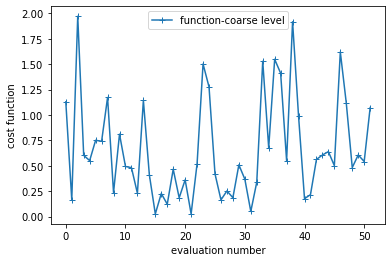

In [18]:
plt.plot(Y[0], label="function-coarse level", marker="+");

plt.xlabel("evaluation number");
plt.ylabel("cost function");
plt.legend();
plt.show();

In [19]:
plt.plot(data_X[0][:,0], label="x0", marker="+");
plt.plot(data_X[0][:,1], label="x1", marker="o");
plt.plot(data_X[0][:,2], label="x2", marker="*");
plt.xlabel("evaluation number");
plt.ylabel("design variables");
plt.legend();
plt.show();

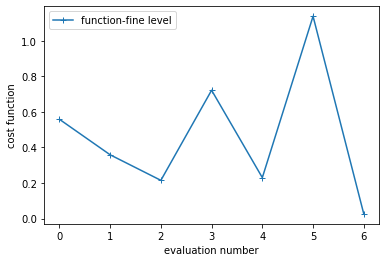

In [20]:
plt.plot(Y[1], label="function-fine level", marker="+");

plt.xlabel("evaluation number");
plt.ylabel("cost function");
plt.legend();
plt.show();

In [21]:
plt.plot(data_X[1]-np.array([[2,0.1,0]]), label='samples')